In [244]:
import os
import tensorflow as tf
import numpy as np

from transformers import BertTokenizer, TFBertModel
from itertools import combinations



In [245]:
import matplotlib.pyplot as plt

In [246]:
for a,b in combinations(zip('abc',[1,2,3]), 2):
    print(a)
    print(b)

('a', 1)
('b', 2)
('a', 1)
('c', 3)
('b', 2)
('c', 3)


## Dimension Visualization



In [247]:
COLORS = {'dep distance': 'tab:blue',
           'lex distance': 'tab:green',
           'der distance': 'tab:orange'}

def load_ckpt(layer_idx):
    languages = ["en"]
    out_dir = f'experiments/train_multi_task2/task_dep_distance_lex_distance_der_distance-layer_{layer_idx}-trainl_en'

    model_dim = 768
    probe_rank = 768


    DistanceProbe = {task: tf.Variable(tf.random_uniform_initializer(minval=-0.5, maxval=0.5)
                                                        ((1,probe_rank)),
                                                        trainable=False, name=f'{task}_probe', dtype=tf.float32)
                                      for task in ['dep_distance', 'lex_distance', 'der_distance']}

    DepthProbe = {task: tf.Variable(tf.random_uniform_initializer(minval=-0.5, maxval=0.5)
                                                        ((1, probe_rank)),
                                            trainable=False, name=f'{task}_probe', dtype=tf.float32)
                          for task in ['lex_depth', 'dep_depth', 'der_depth']}

    optimizer=tf.optimizers.Adam()

    LanguageMaps = {lang: tf.Variable(tf.initializers.Identity(gain=1.0)((model_dim, model_dim)),
                                                   trainable=False, name='{}_map'.format(lang))
                                 for lang in languages}


    ckpt = tf.train.Checkpoint(optimizer=optimizer,**DistanceProbe, **DepthProbe, **LanguageMaps)

    checkpoint_manger = tf.train.CheckpointManager(ckpt, os.path.join(out_dir, 'params'), max_to_keep=1)

    checkpoint_manger.restore_or_initialize()
    
    return ckpt
    
    
def visualize_disentanglement(loadings, task_names, pair_wise=True):

    sorting_array = np.argsort(np.sum(np.array([-1 * (100 ** expon) * np.abs(probe_loadings)
                                       for expon, probe_loadings in zip(np.arange(len(loadings)), loadings)]), axis=0))

    fig, ax = plt.subplots(figsize=[16,9])
    for probe_loadings, t_name in zip(loadings, task_names):
        ax.plot(np.abs(probe_loadings[sorting_array]), '.', label=t_name, color=COLORS[t_name])
        ax.legend()
        ax.set_title(f'Layer: {layer_idx}')
    plt.show()
    
    if pair_wise:
        for (pl_a, tn_a), (pl_b, tn_b) in combinations(zip(loadings, task_names), 2):
            sorting_array = np.argsort(-1 *(100 * np.abs(pl_a) + np.abs(pl_b)))
            fig, ax = plt.subplots(figsize=[16,9])
            ax.plot(np.abs(pl_a[sorting_array]), '.', label=tn_a, color=COLORS[tn_a])
            ax.plot(np.abs(pl_b[sorting_array]), '.', label=tn_b, color=COLORS[tn_b])
            ax.legend()
            plt.show()



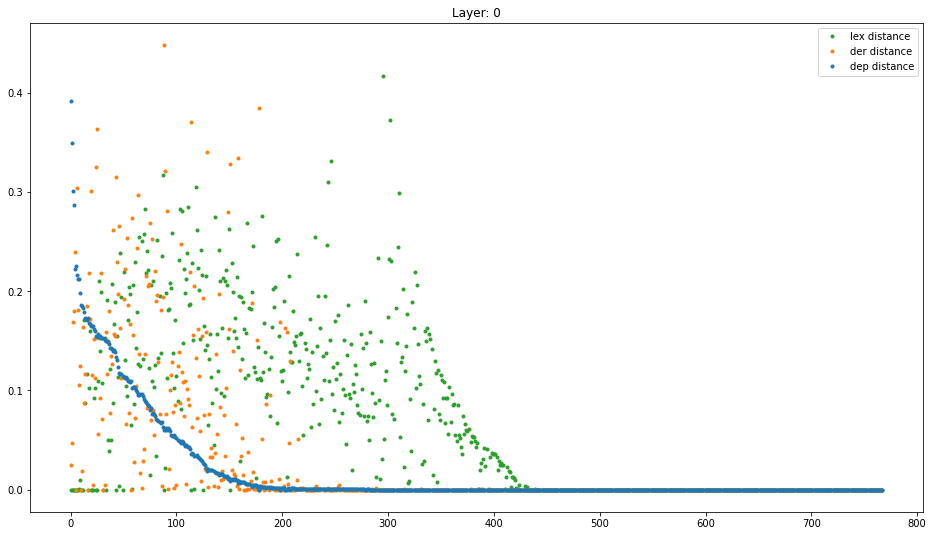

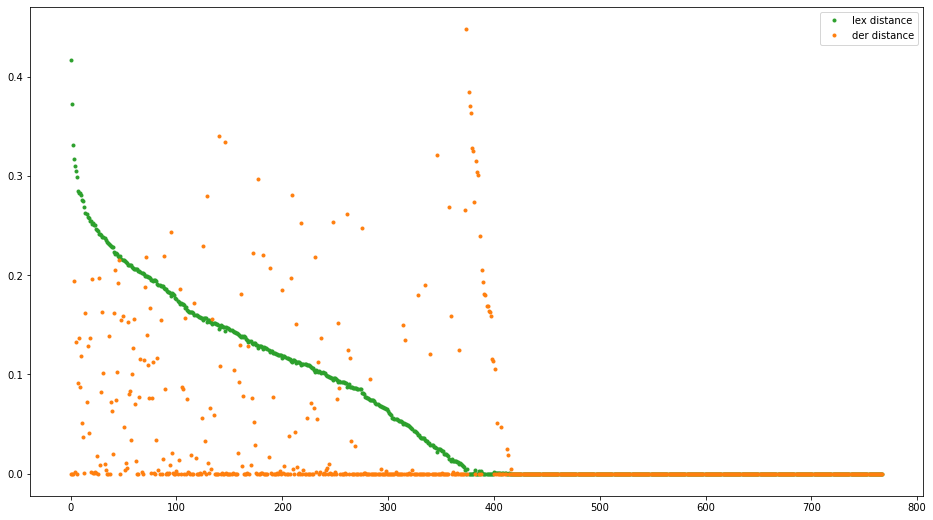

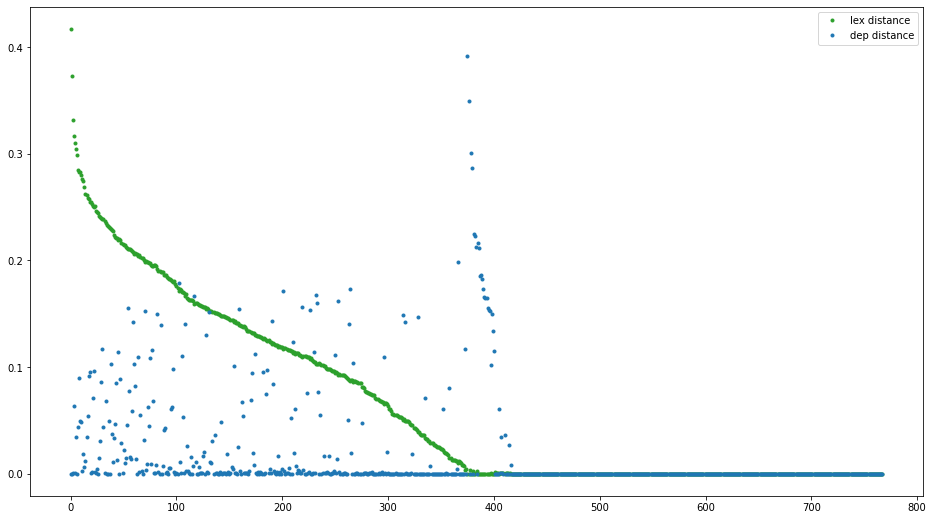

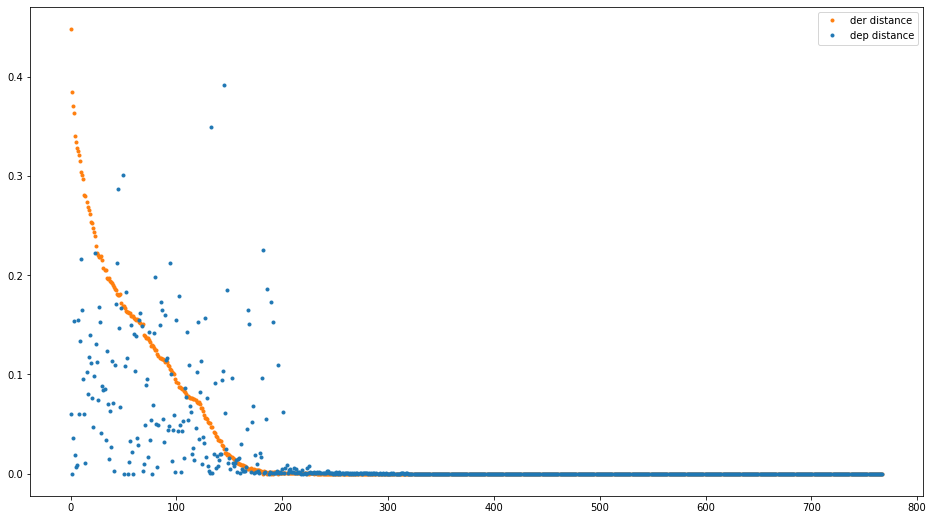

In [248]:
layer_idx = 0

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, der_distance_probe, dep_distance_probe], 
                              ['lex distance', 'der distance','dep distance'])

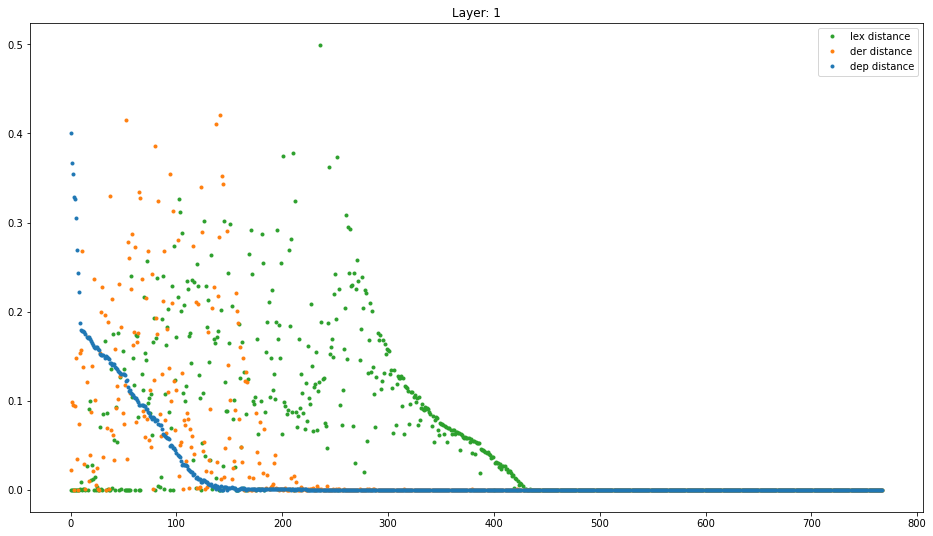

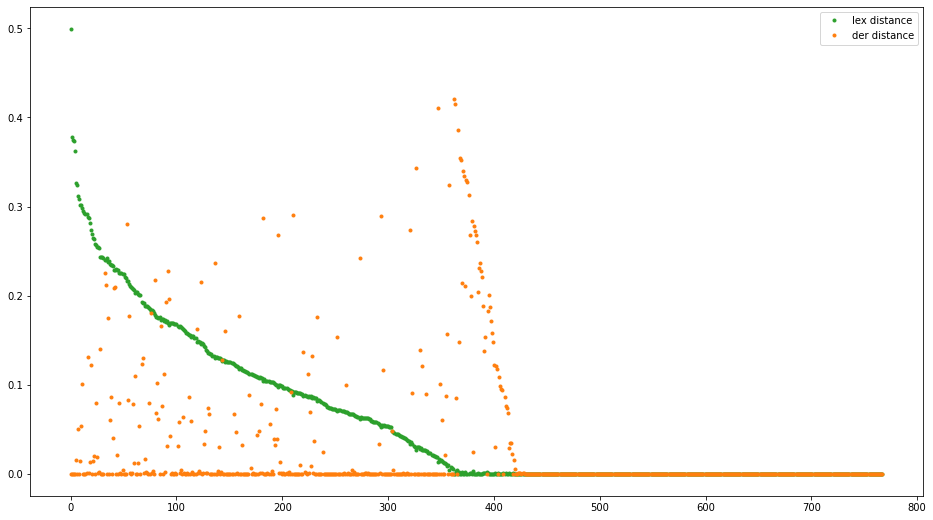

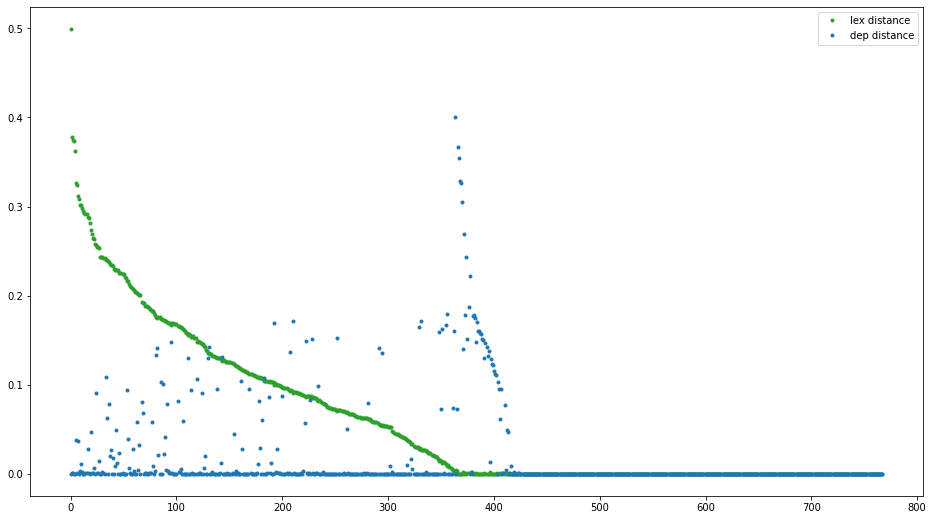

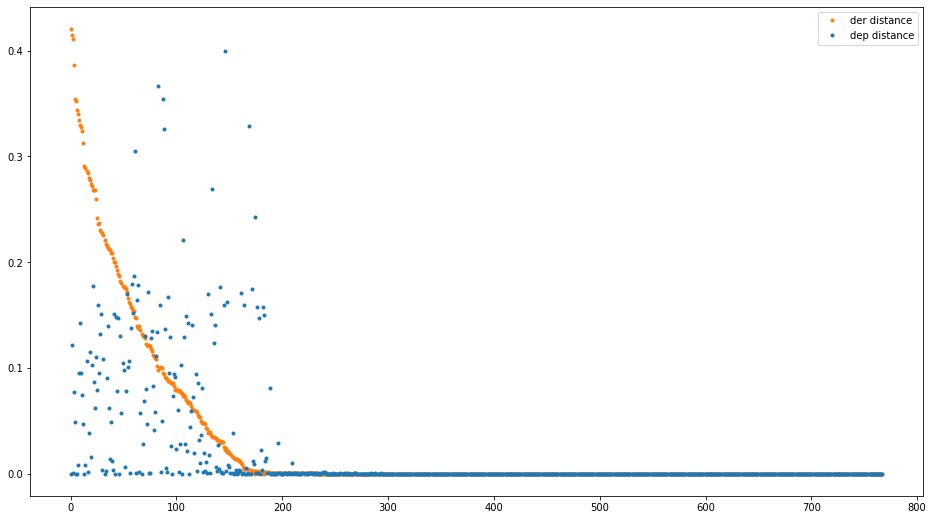

In [249]:
layer_idx = 1

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, der_distance_probe, dep_distance_probe], 
                              ['lex distance', 'der distance','dep distance'])

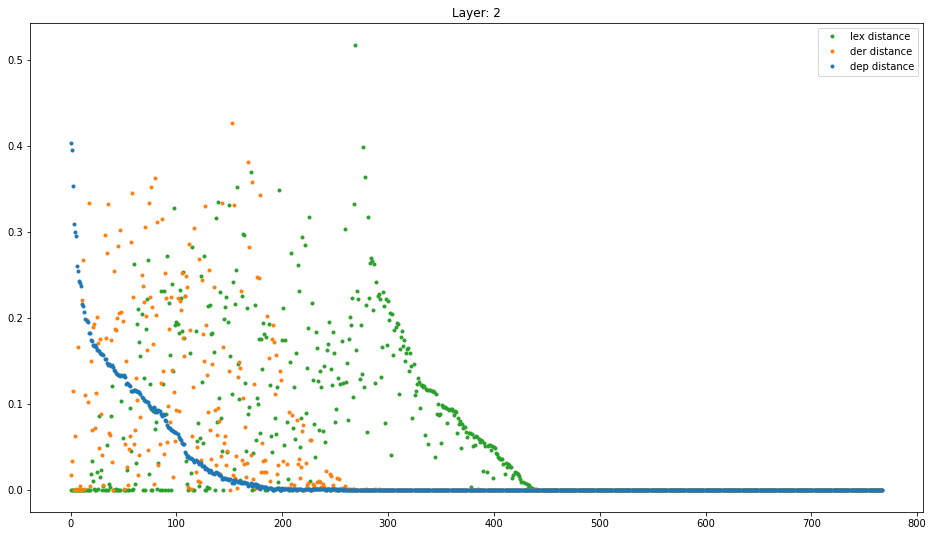

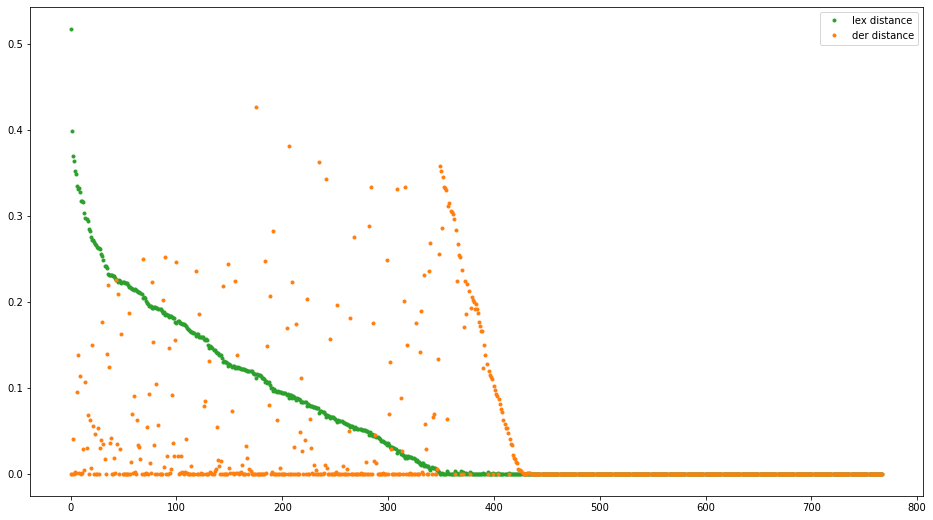

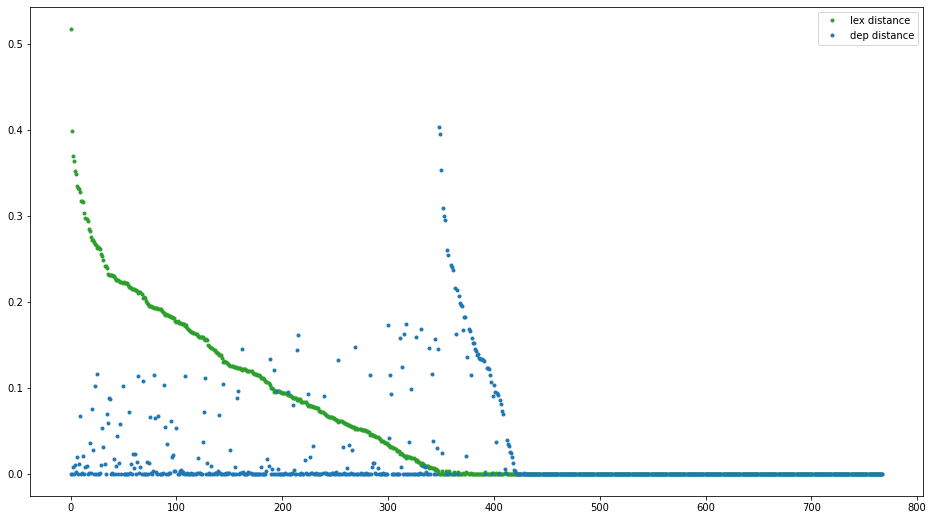

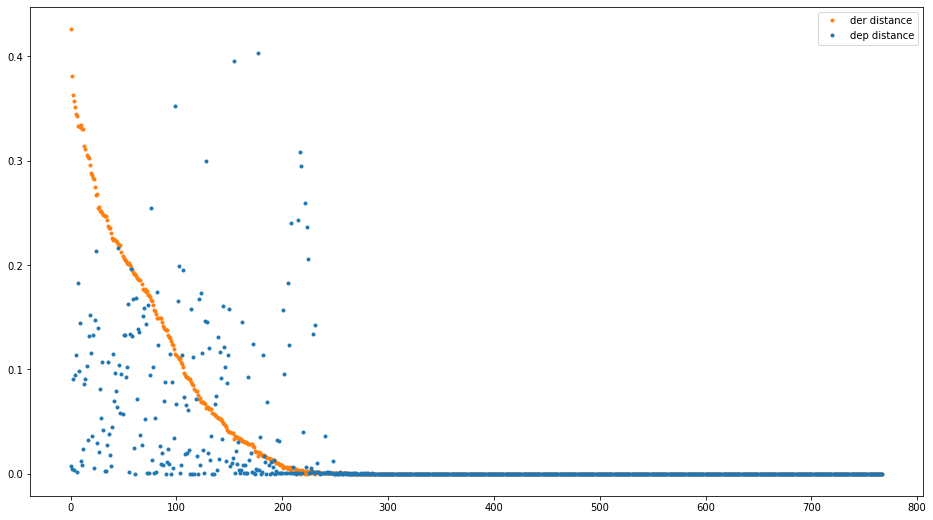

In [250]:
layer_idx = 2

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, der_distance_probe, dep_distance_probe], 
                              ['lex distance', 'der distance','dep distance'])

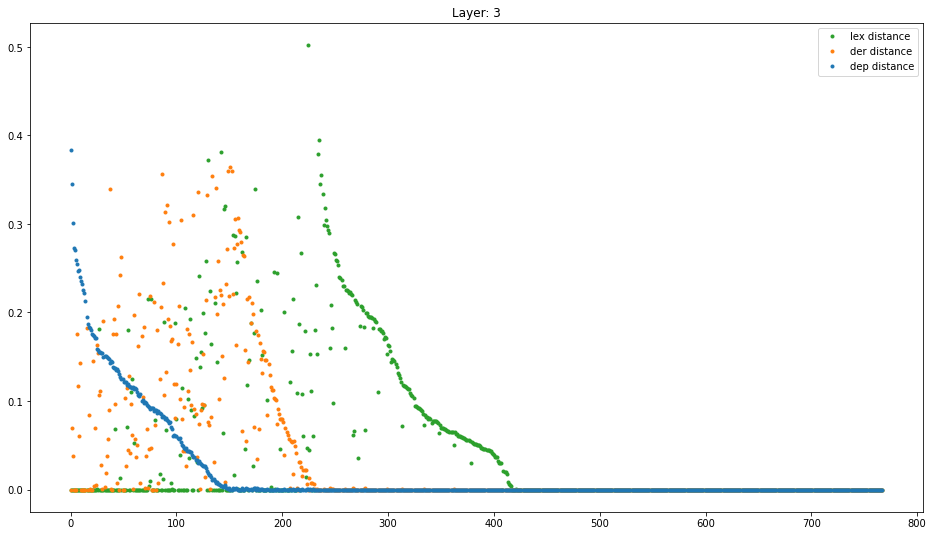

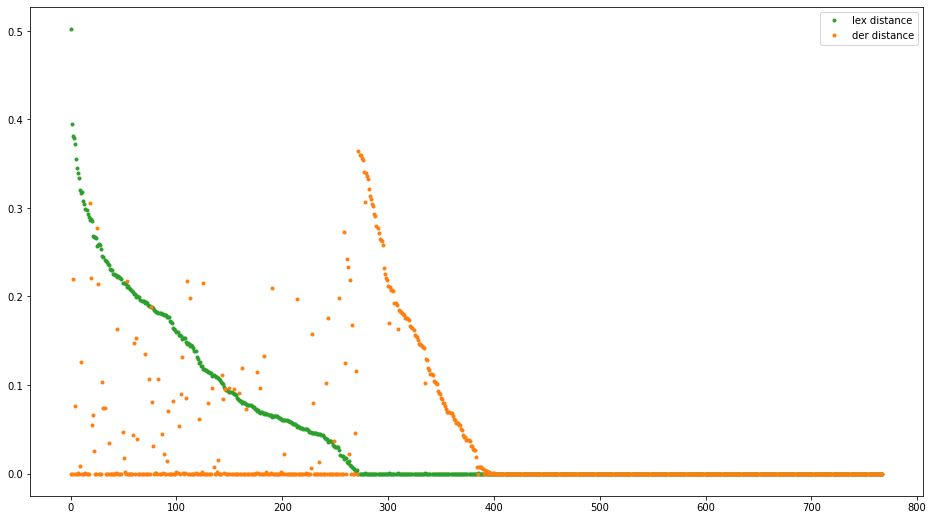

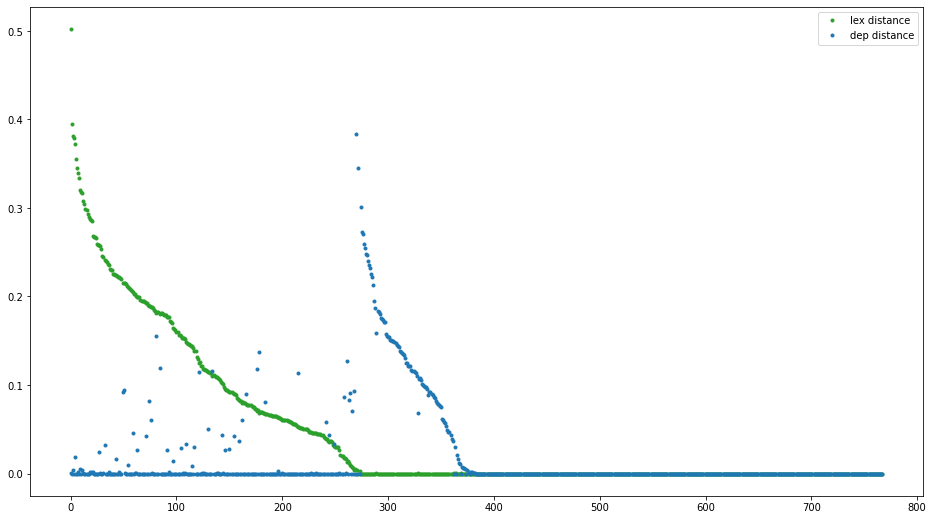

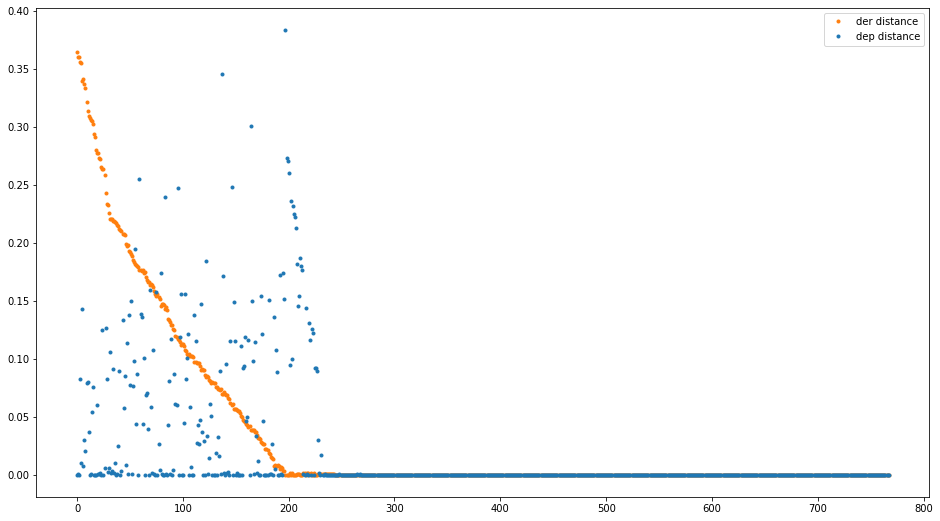

In [251]:
layer_idx = 3

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, der_distance_probe, dep_distance_probe], 
                              ['lex distance', 'der distance','dep distance'])

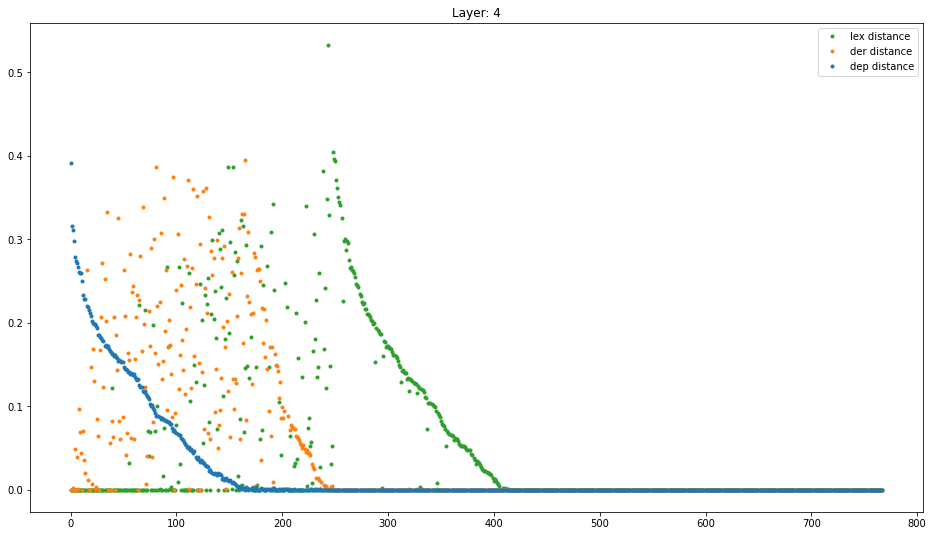

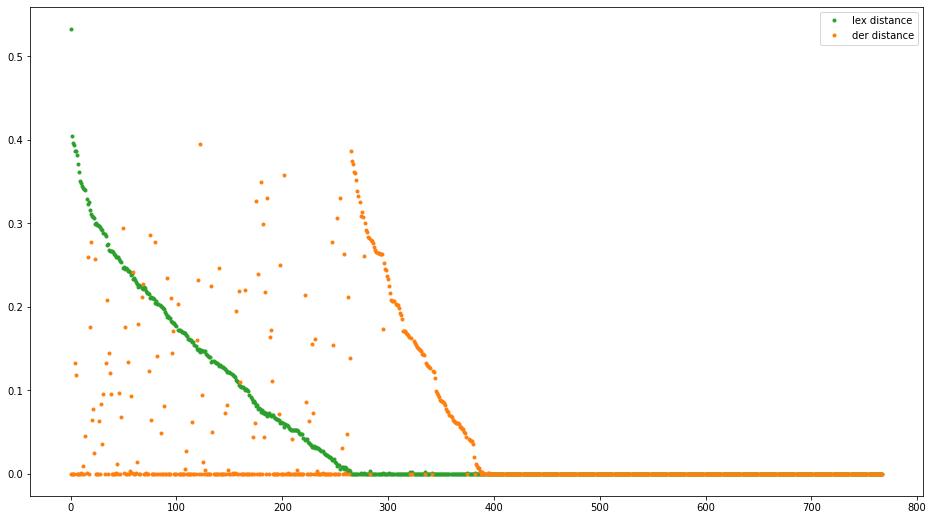

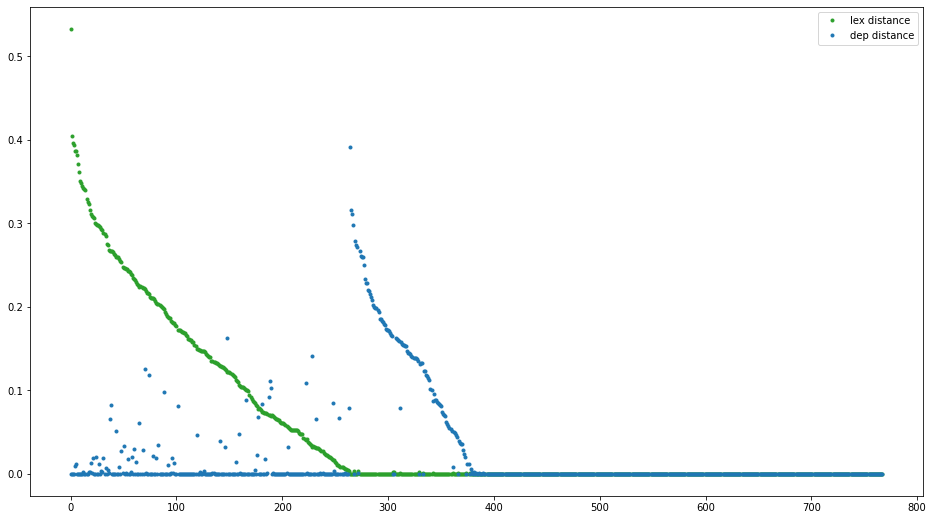

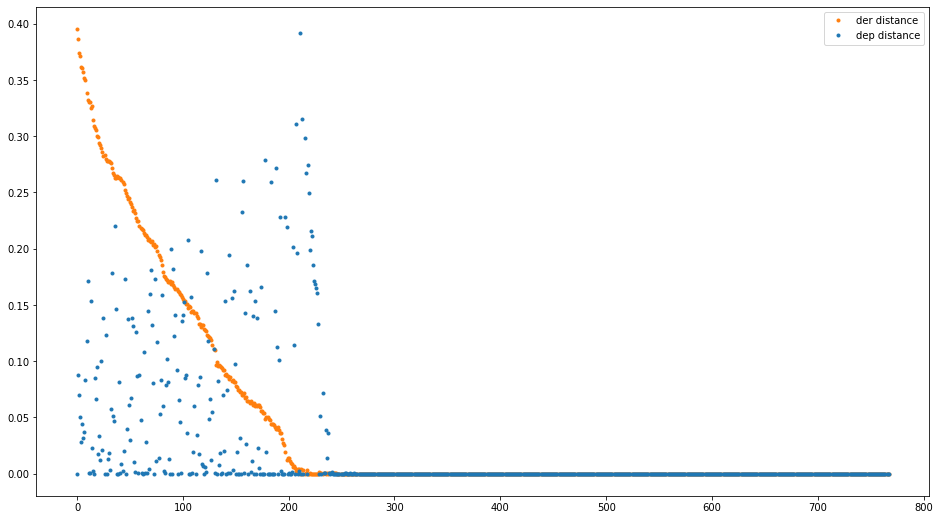

In [252]:
layer_idx = 4

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, der_distance_probe, dep_distance_probe], 
                              ['lex distance', 'der distance','dep distance'])

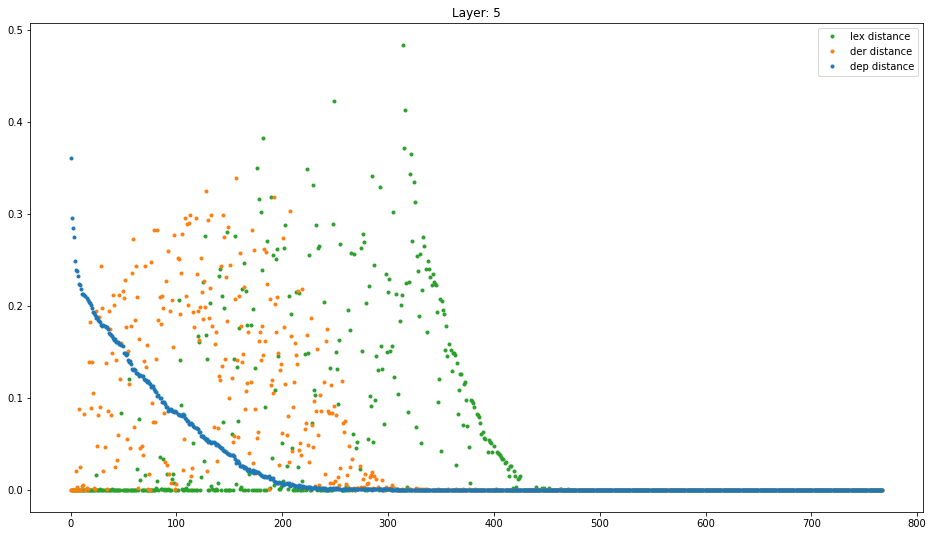

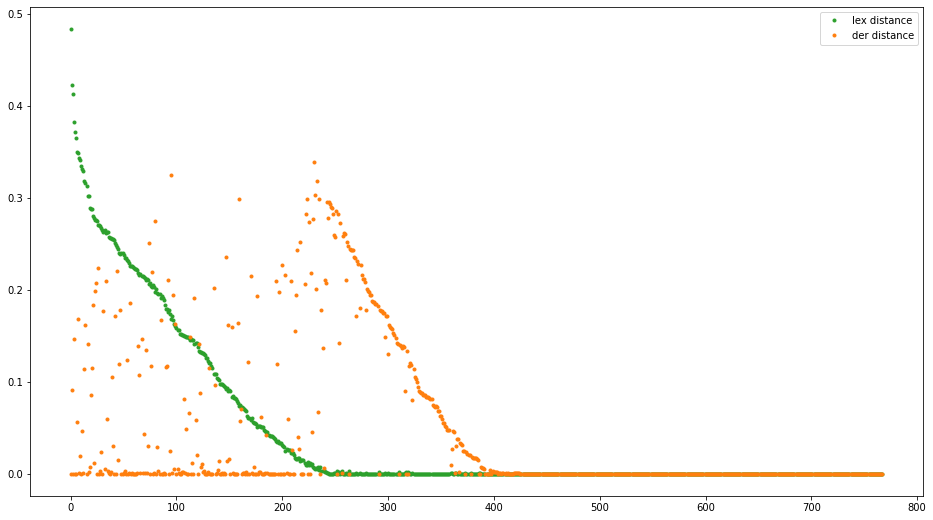

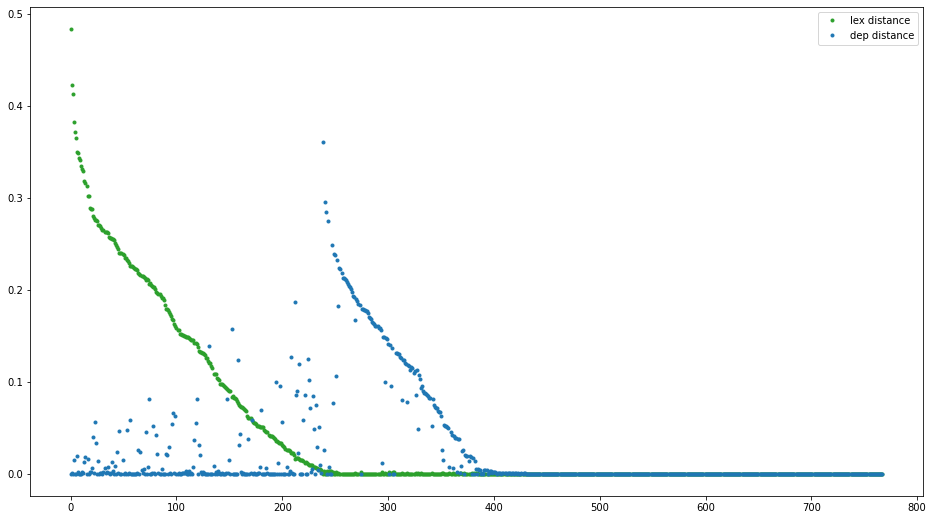

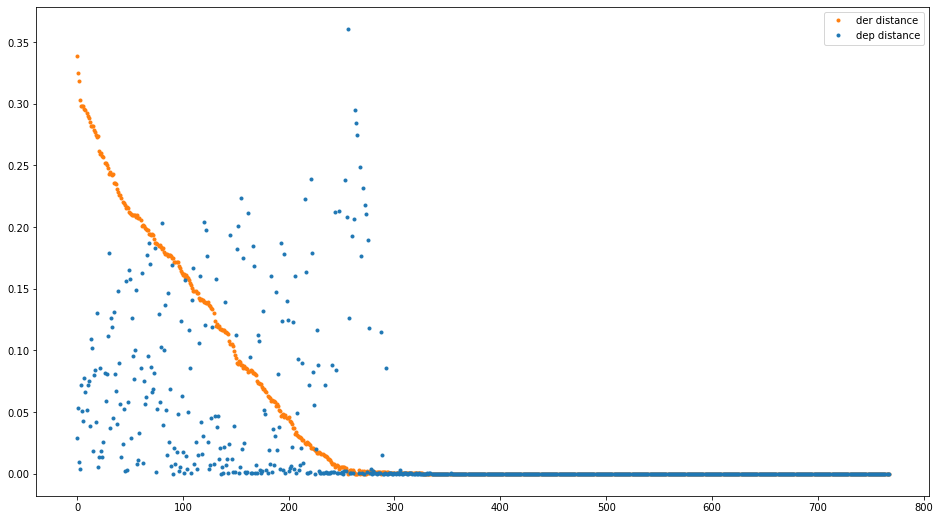

In [253]:
layer_idx = 5

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, der_distance_probe, dep_distance_probe], 
                              ['lex distance', 'der distance','dep distance'])

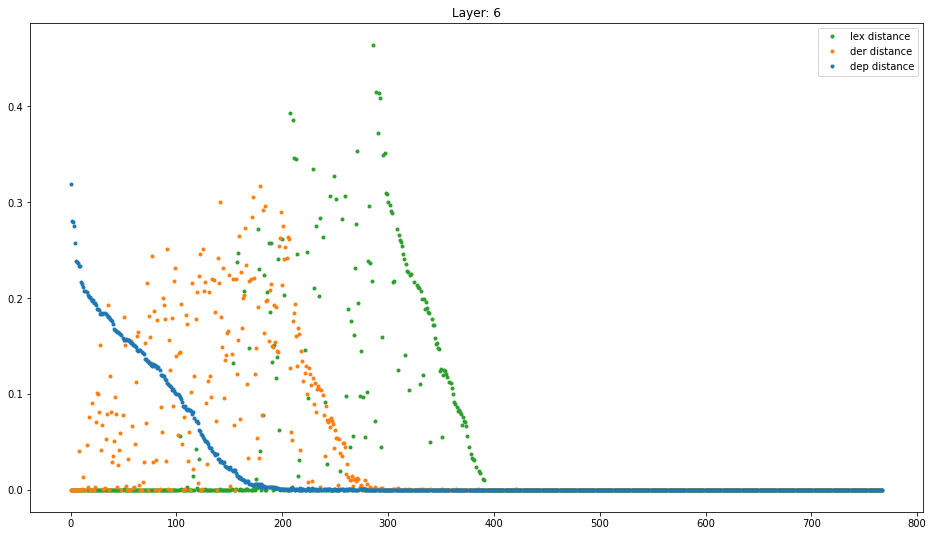

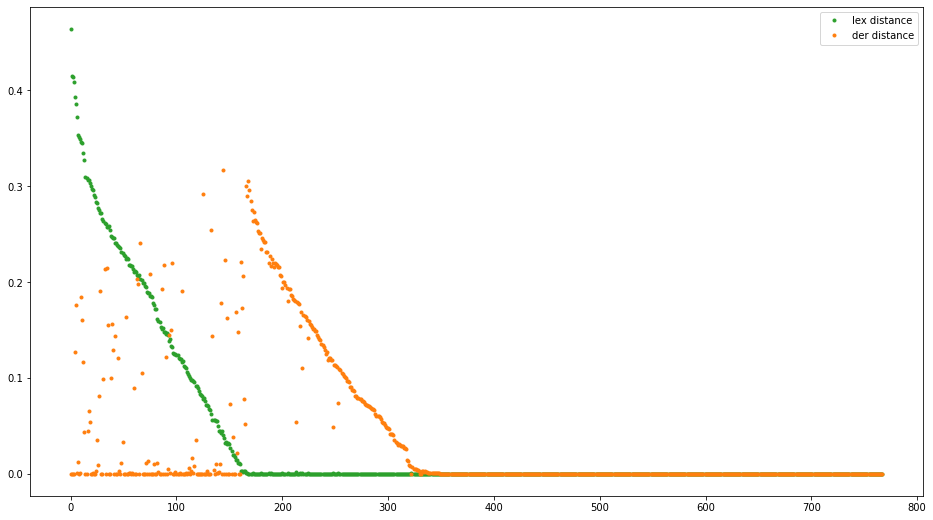

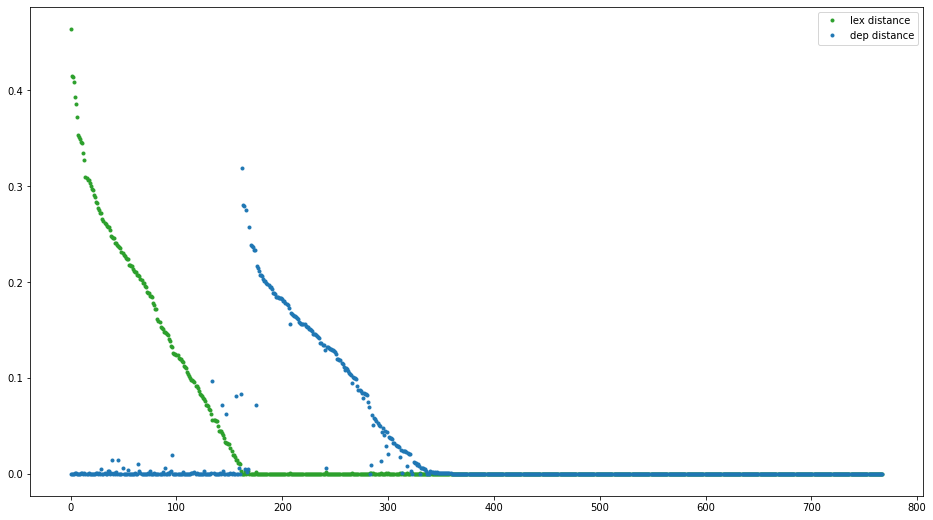

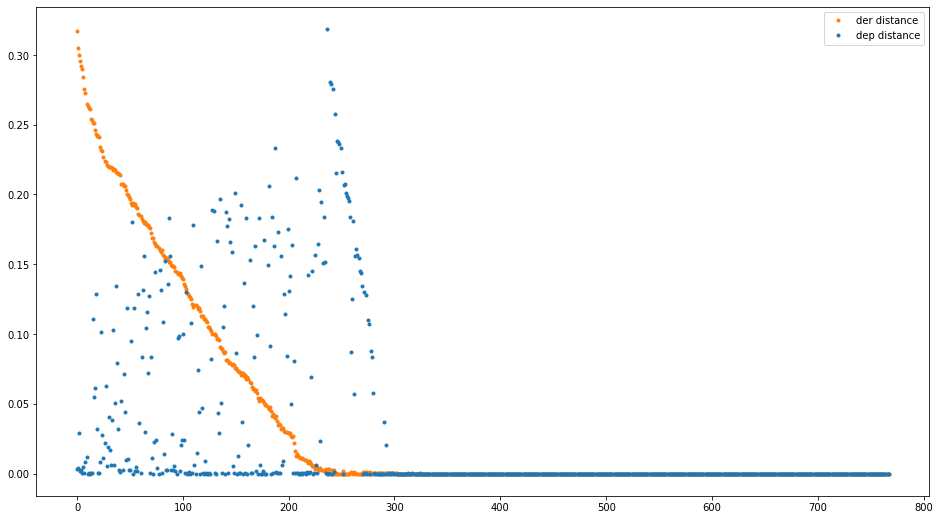

In [254]:
 layer_idx = 6

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, der_distance_probe, dep_distance_probe], 
                              ['lex distance','der distance', 'dep distance'])

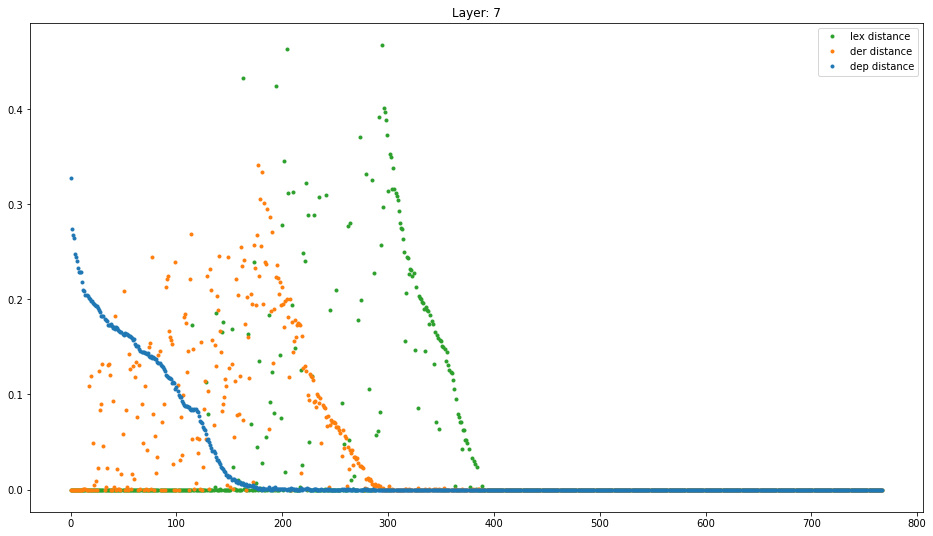

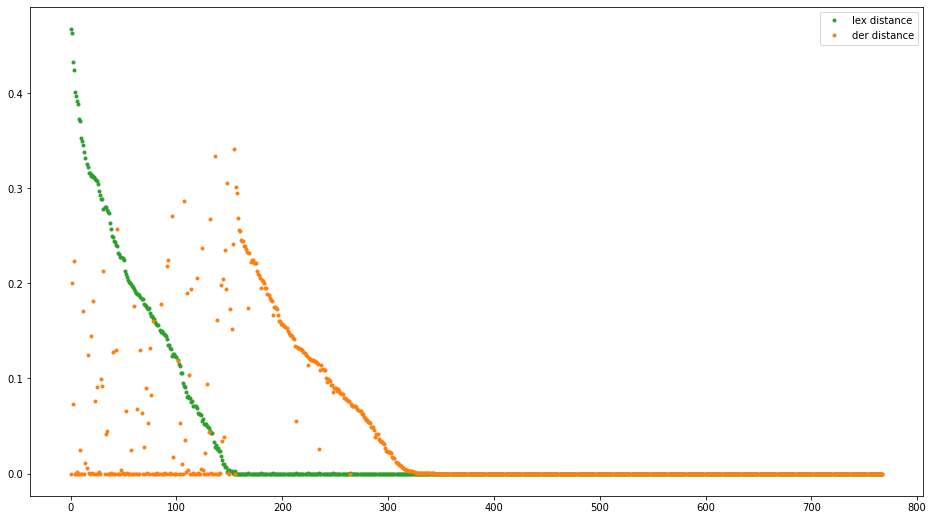

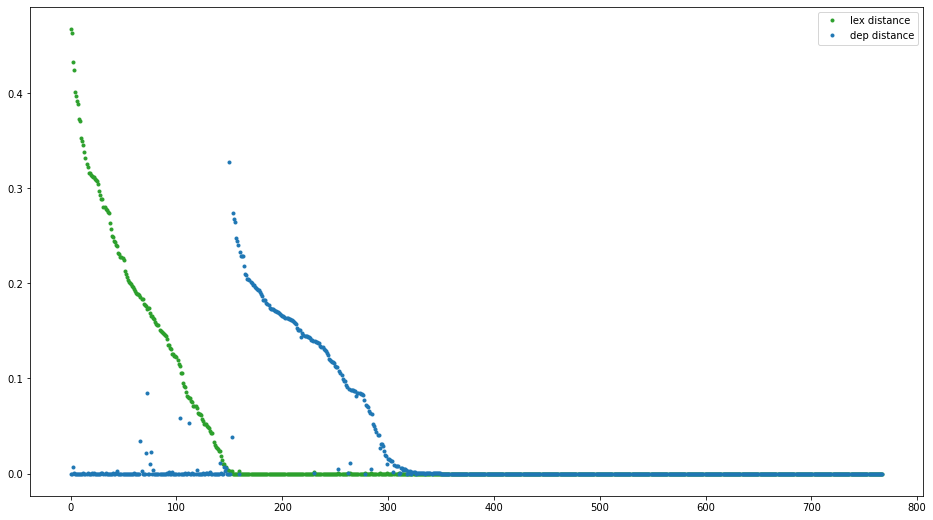

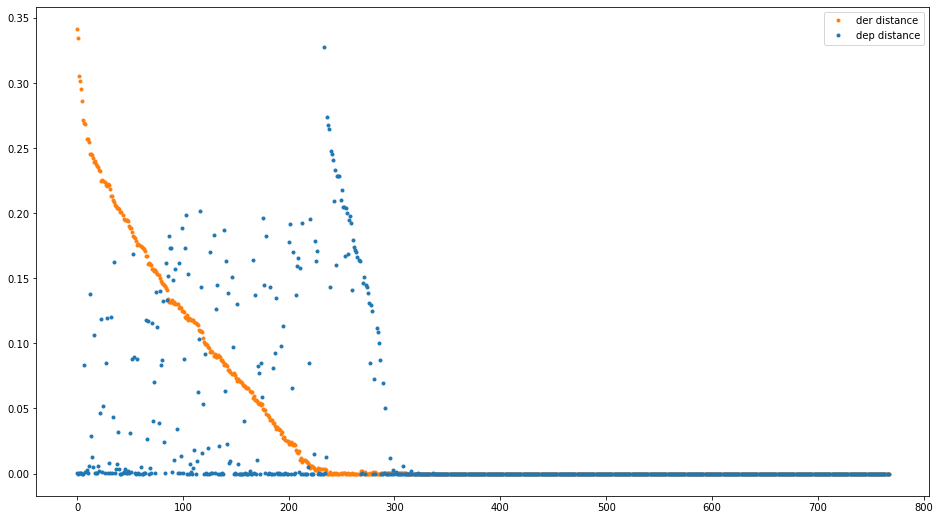

In [255]:
 layer_idx = 7

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, der_distance_probe, dep_distance_probe], 
                              ['lex distance','der distance', 'dep distance'])

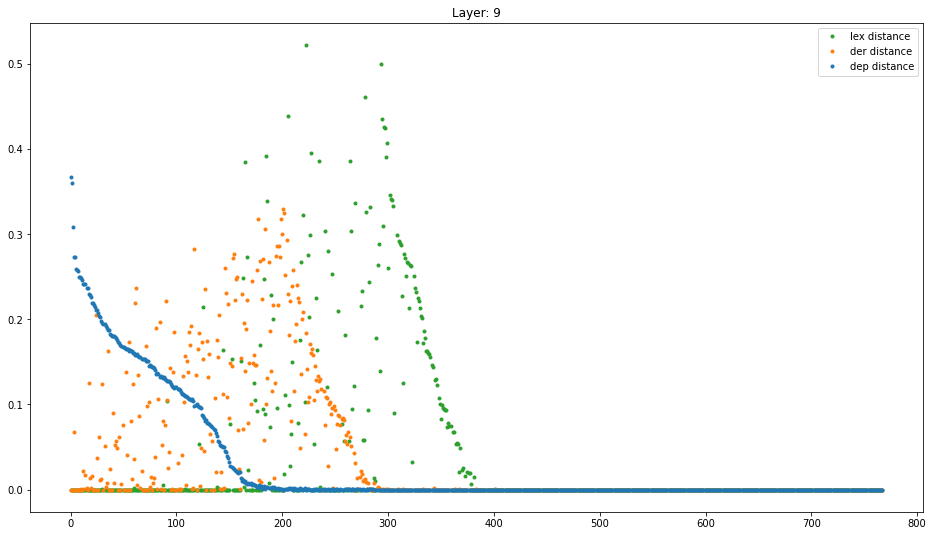

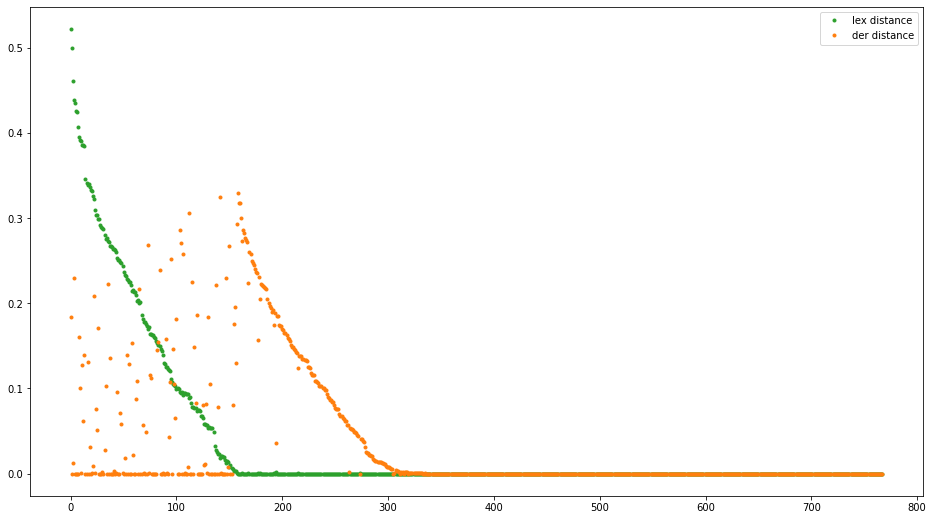

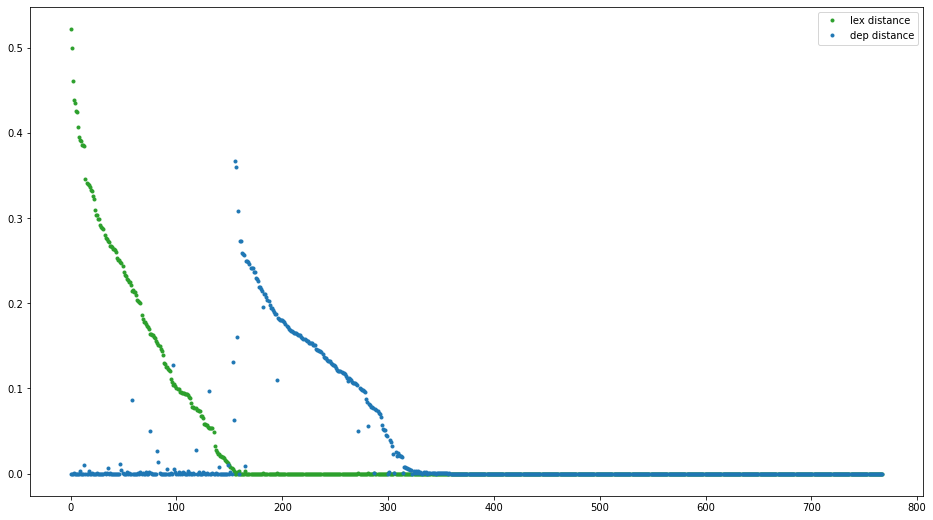

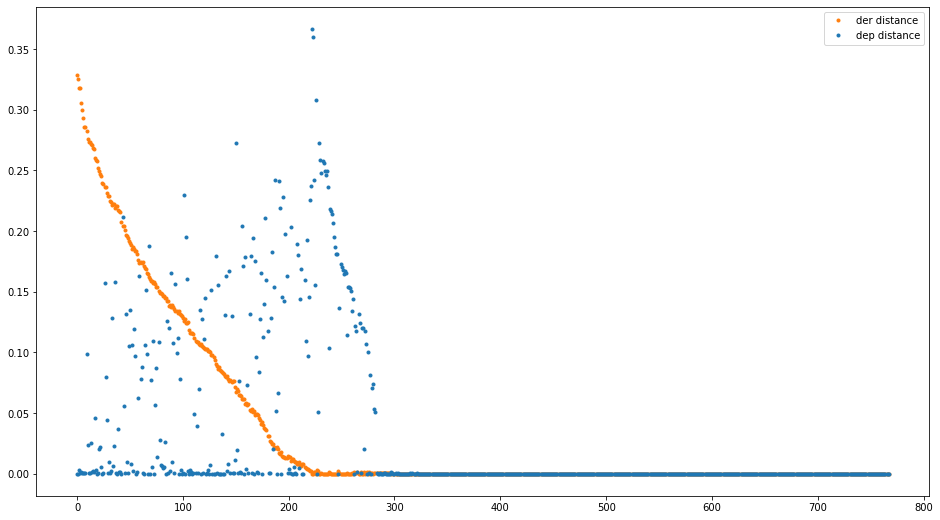

In [256]:
 layer_idx = 9

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, der_distance_probe, dep_distance_probe], 
                              ['lex distance','der distance', 'dep distance'])

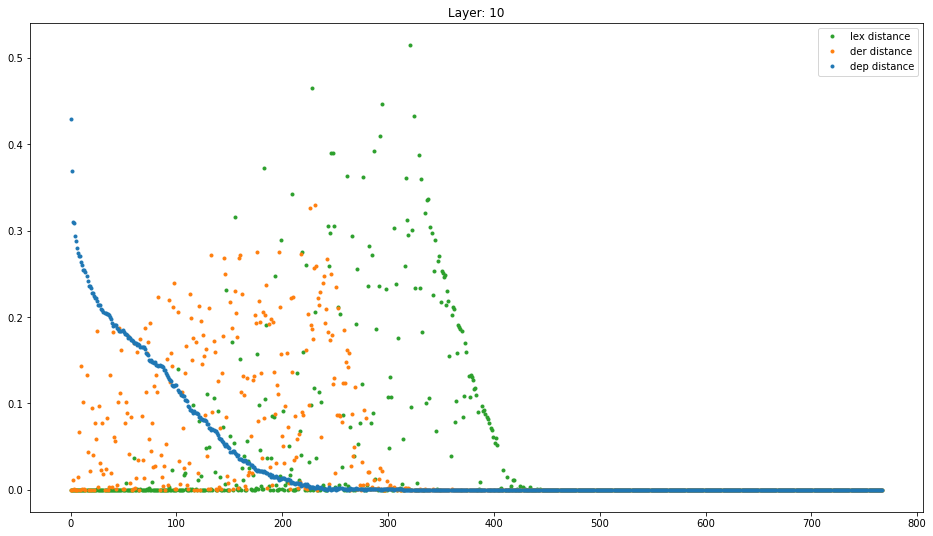

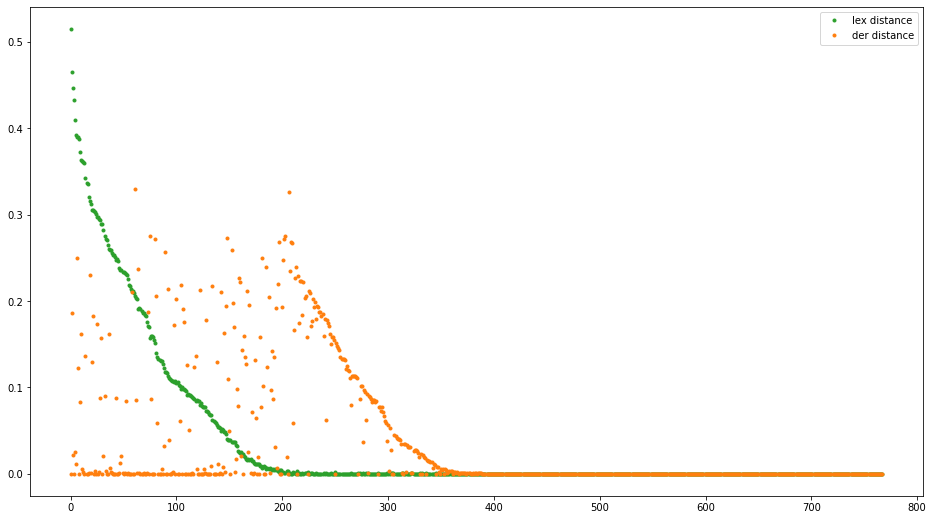

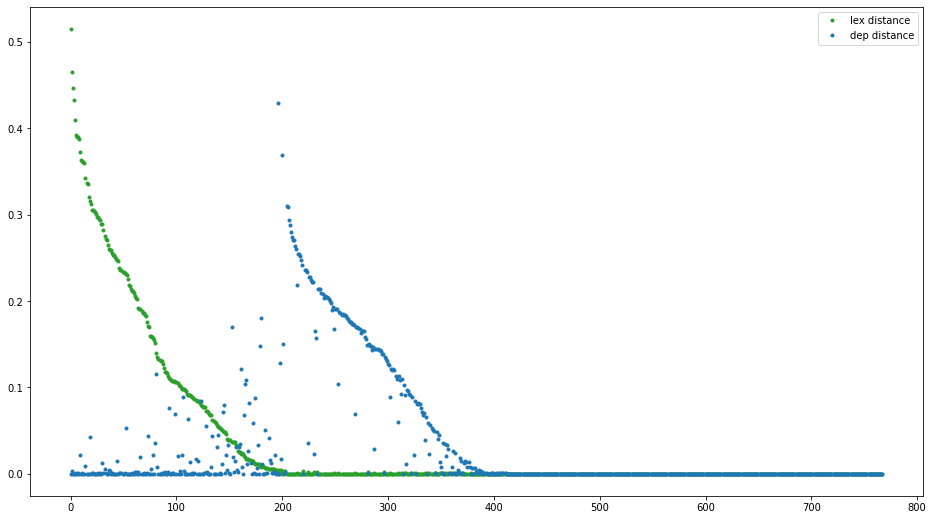

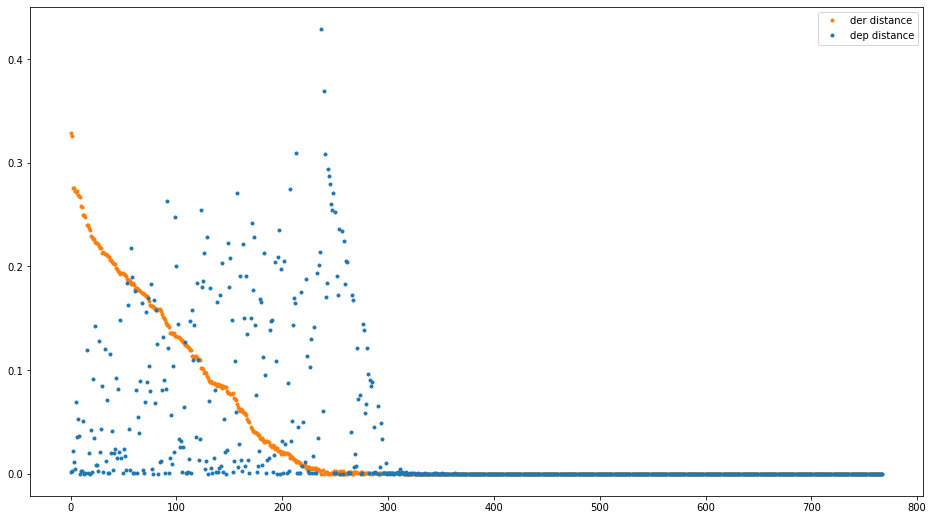

In [257]:
layer_idx = 10

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, der_distance_probe, dep_distance_probe], 
                              ['lex distance','der distance', 'dep distance'])

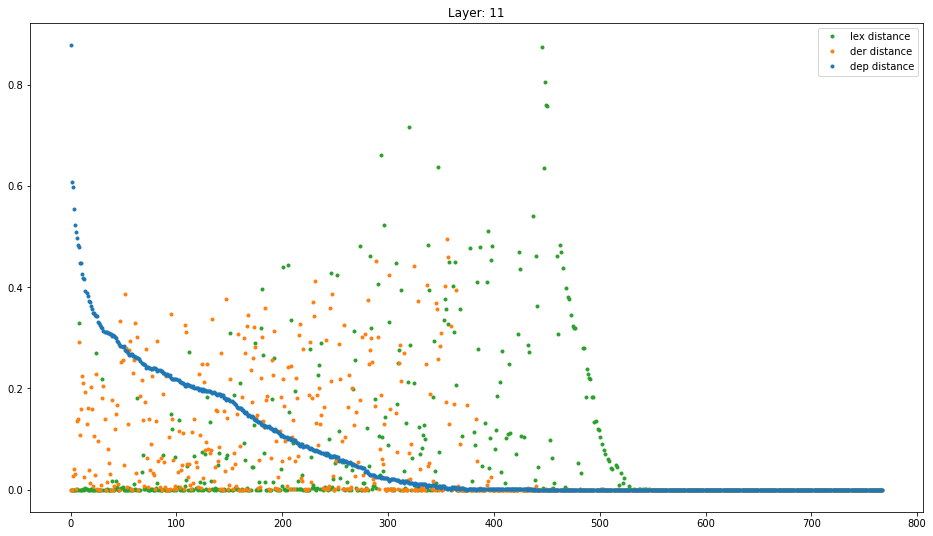

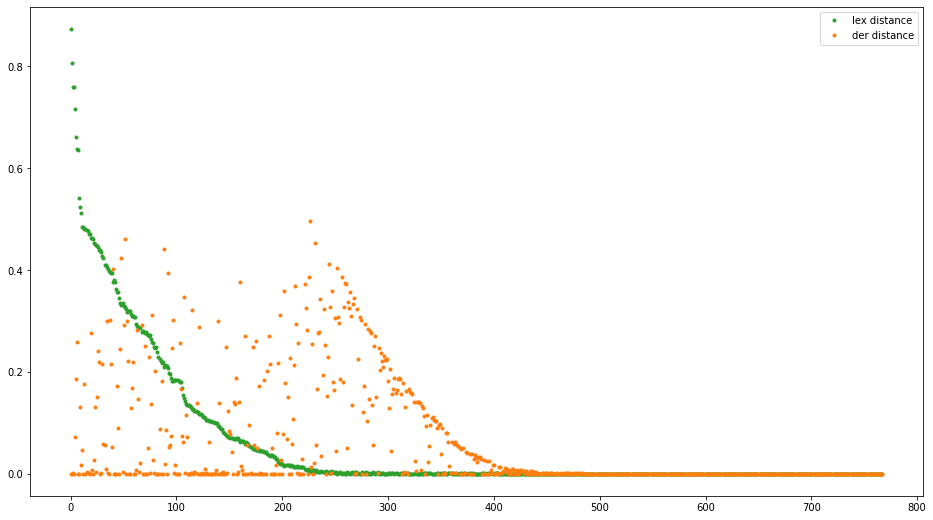

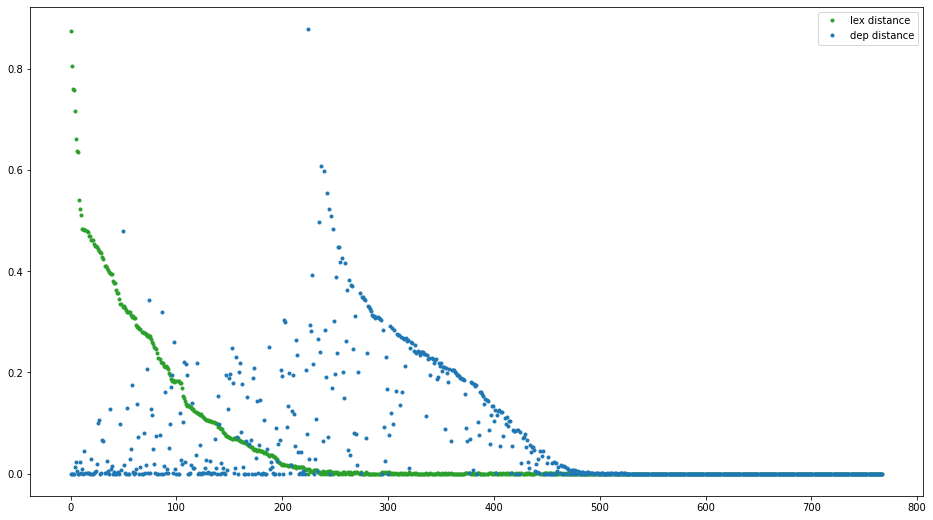

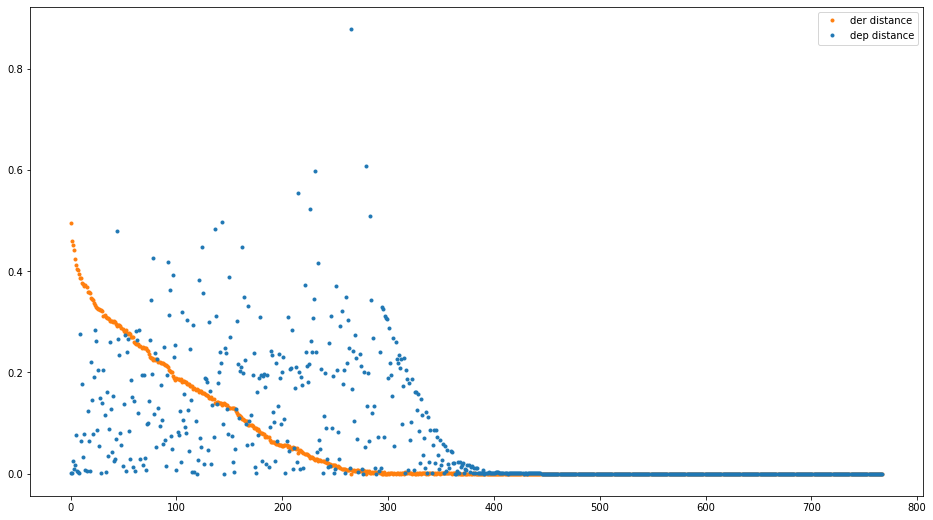

In [258]:
layer_idx = 11

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, der_distance_probe, dep_distance_probe], 
                              ['lex distance','der distance', 'dep distance'])

### Other orderings of tasks



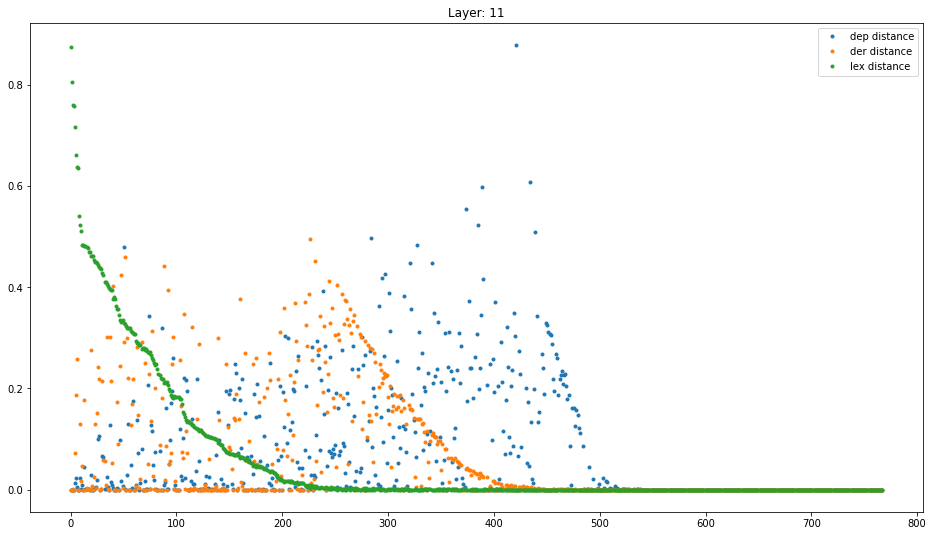

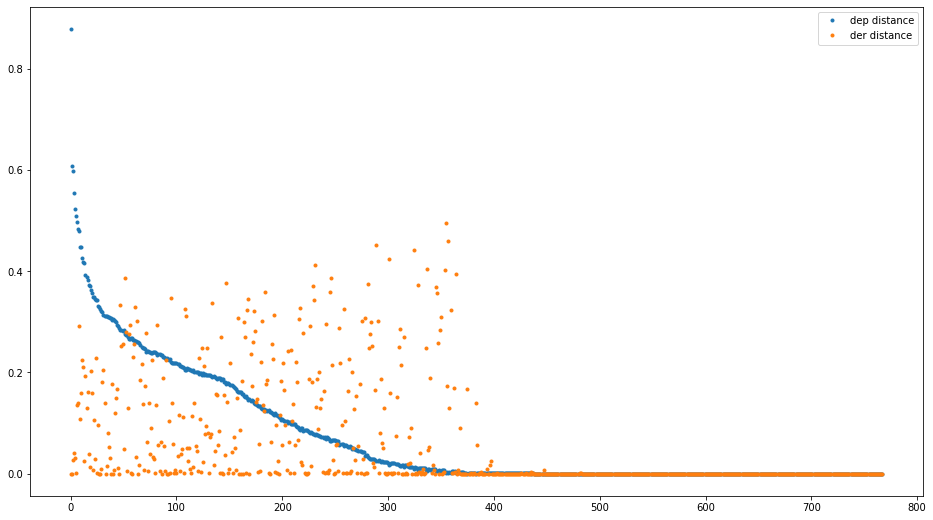

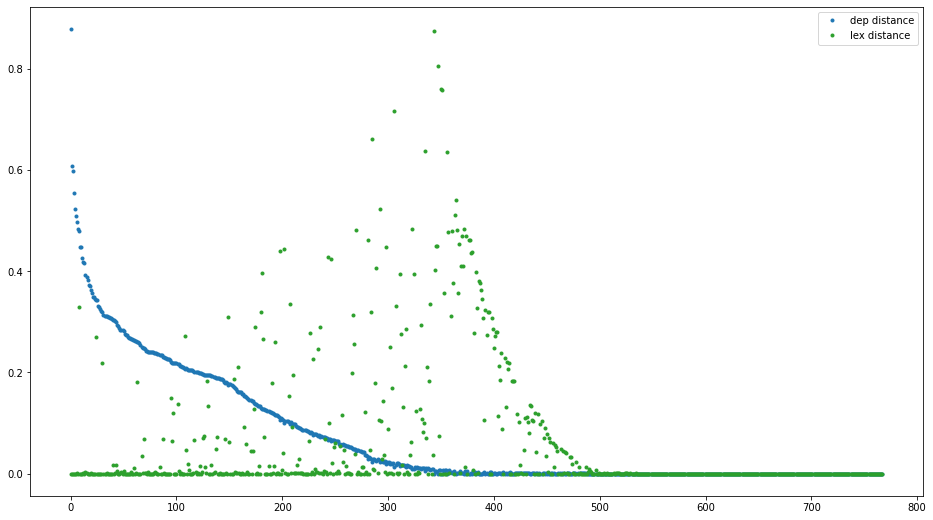

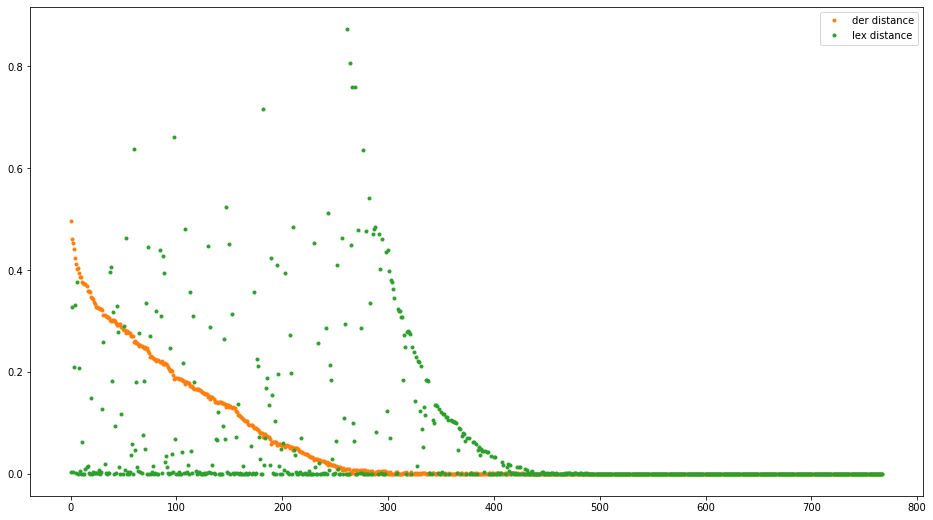

In [259]:
layer_idx = 11

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([dep_distance_probe, der_distance_probe, lex_distance_probe], 
                              ['dep distance', 'der distance', 'lex distance'])

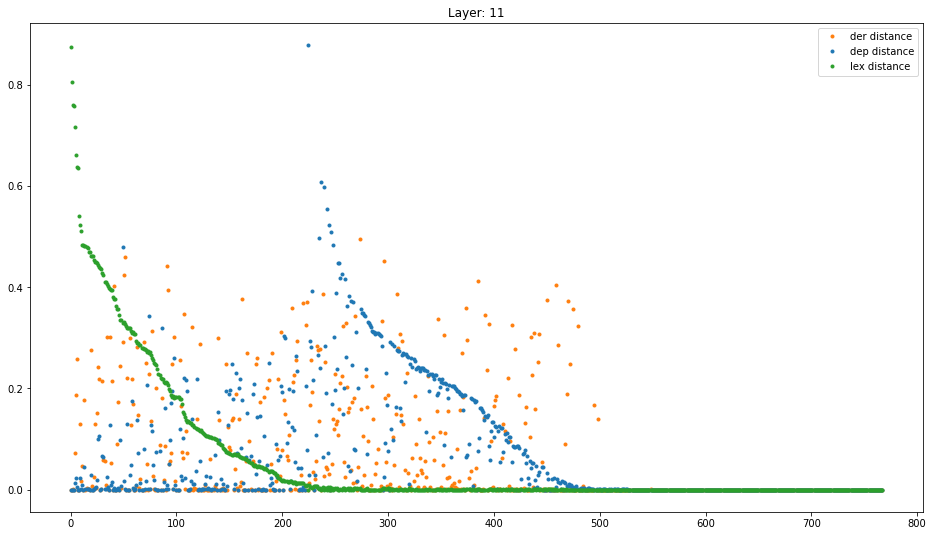

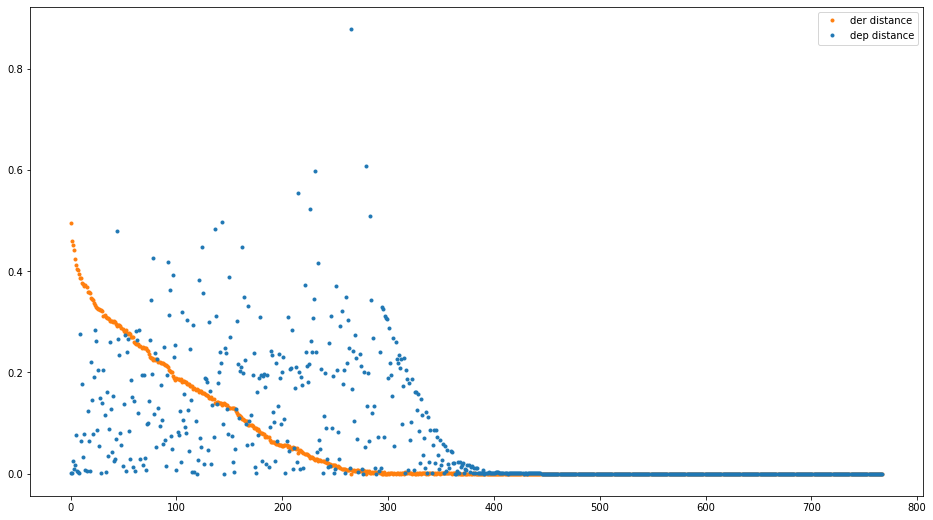

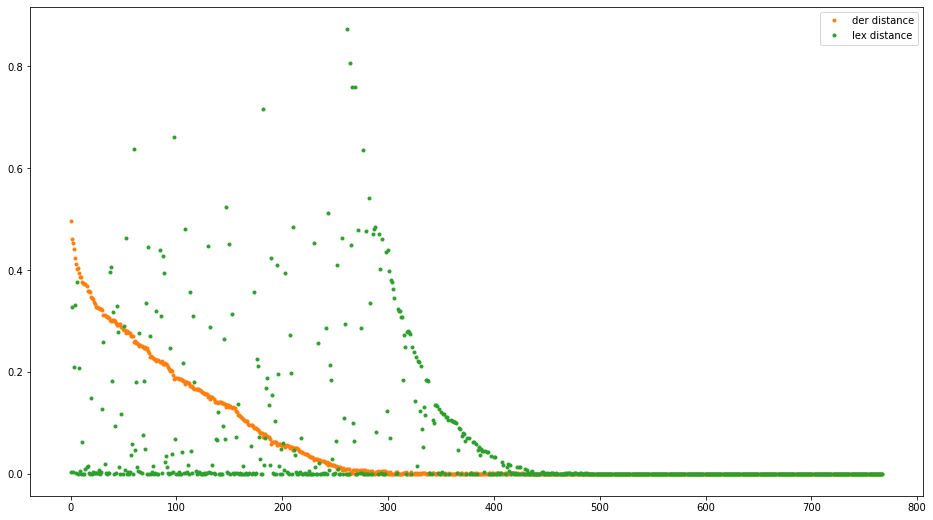

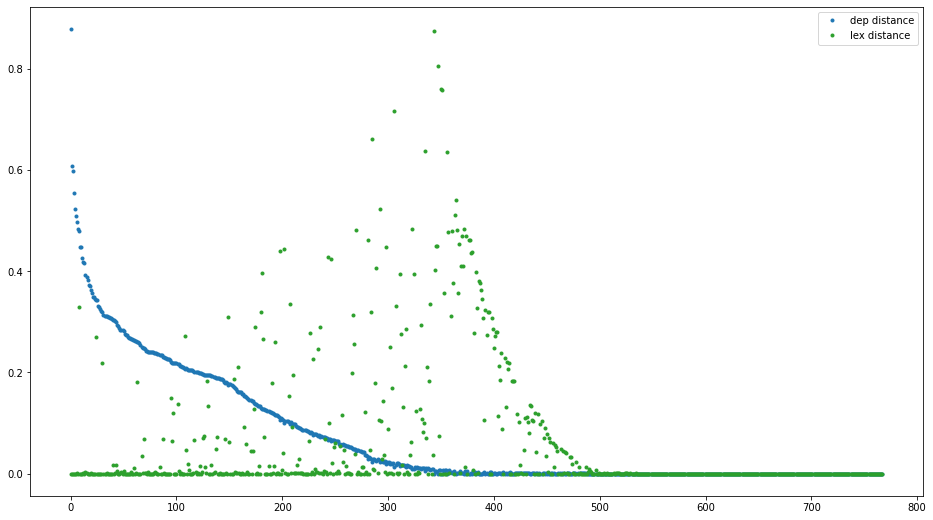

In [260]:
layer_idx = 11

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([der_distance_probe, dep_distance_probe, lex_distance_probe], 
                              ['der distance', 'dep distance', 'lex distance'])

## lex vs dep


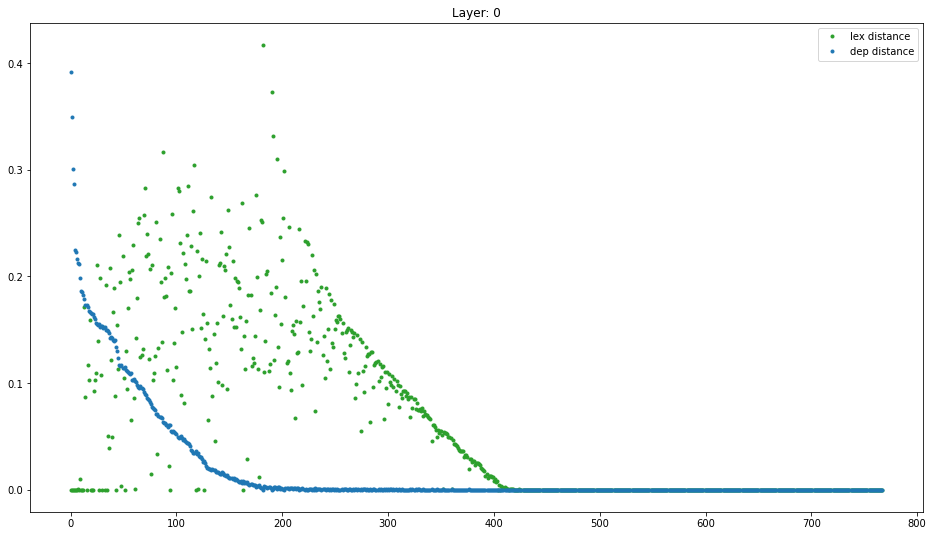

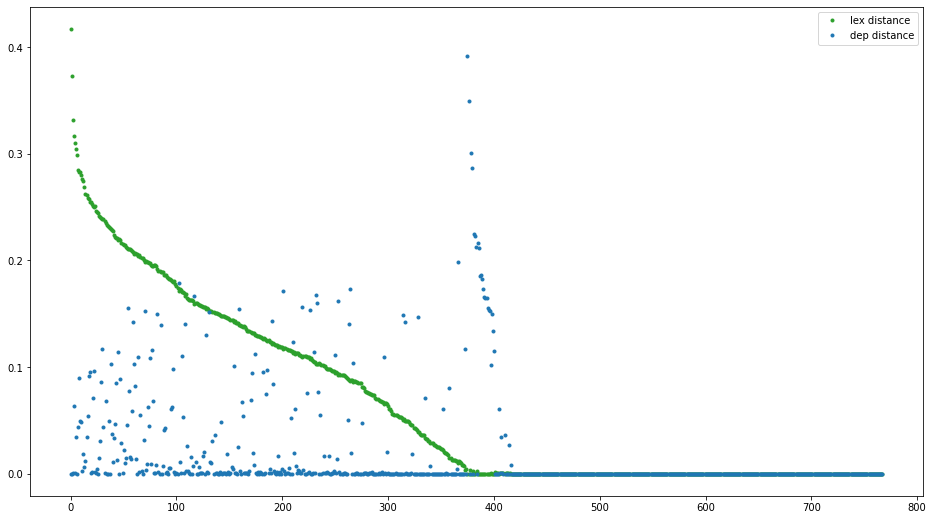

In [261]:
layer_idx = 0

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

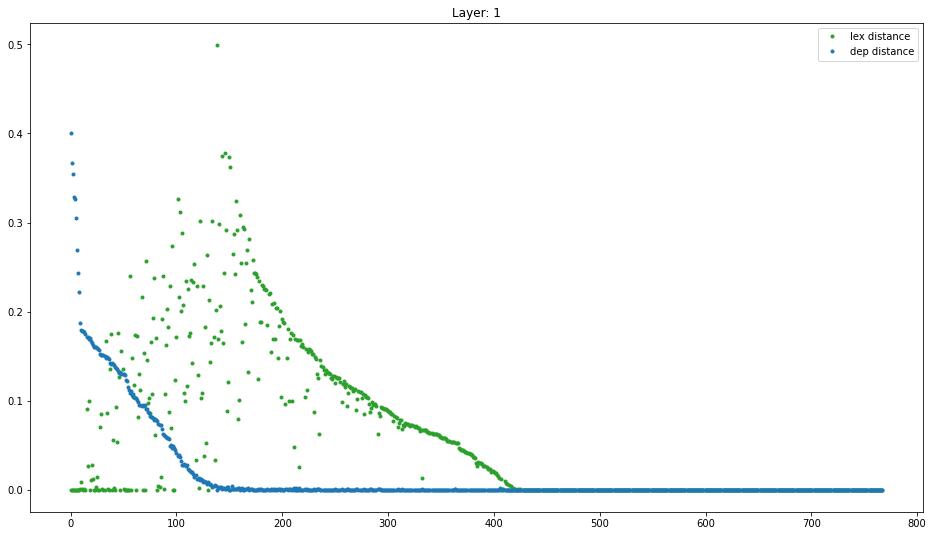

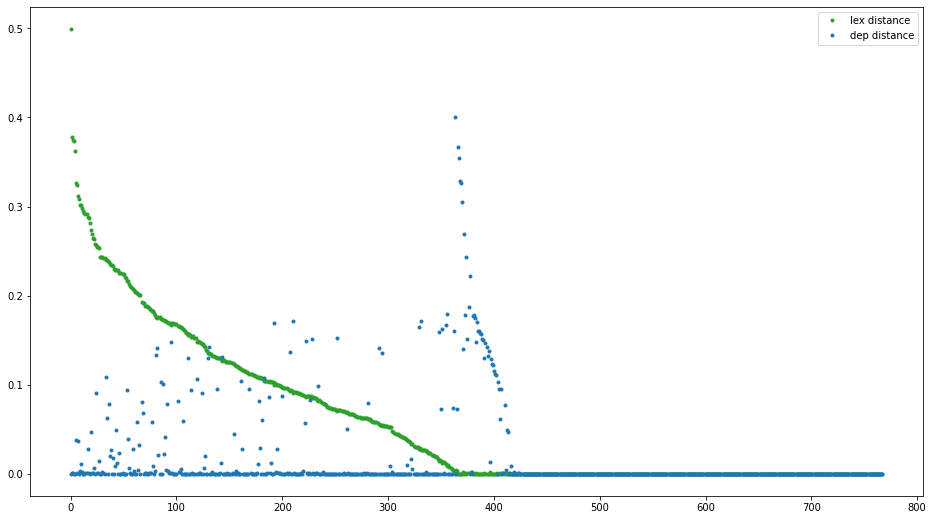

In [262]:
layer_idx = 1

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

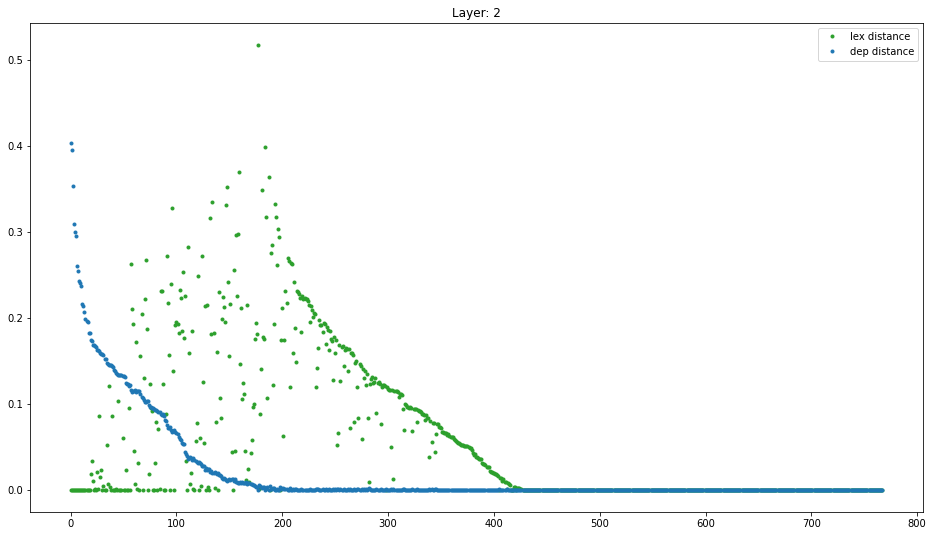

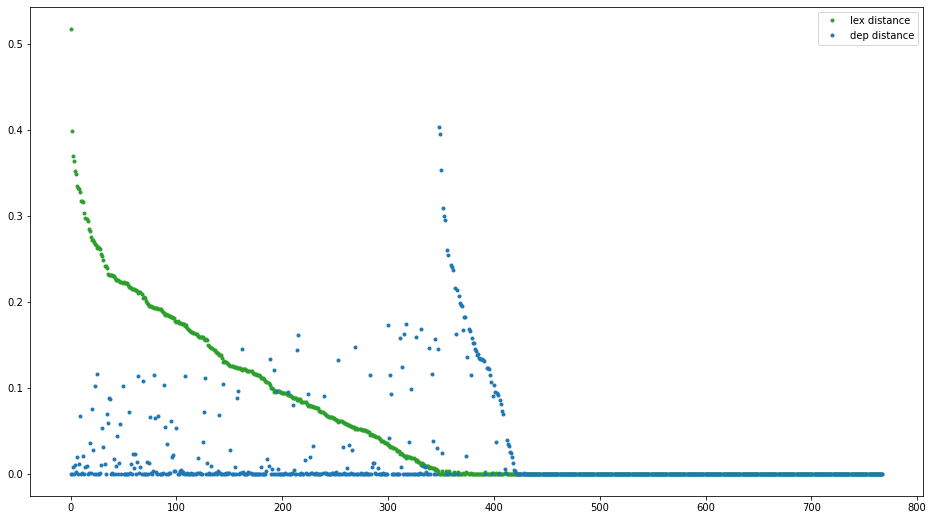

In [263]:
layer_idx = 2

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

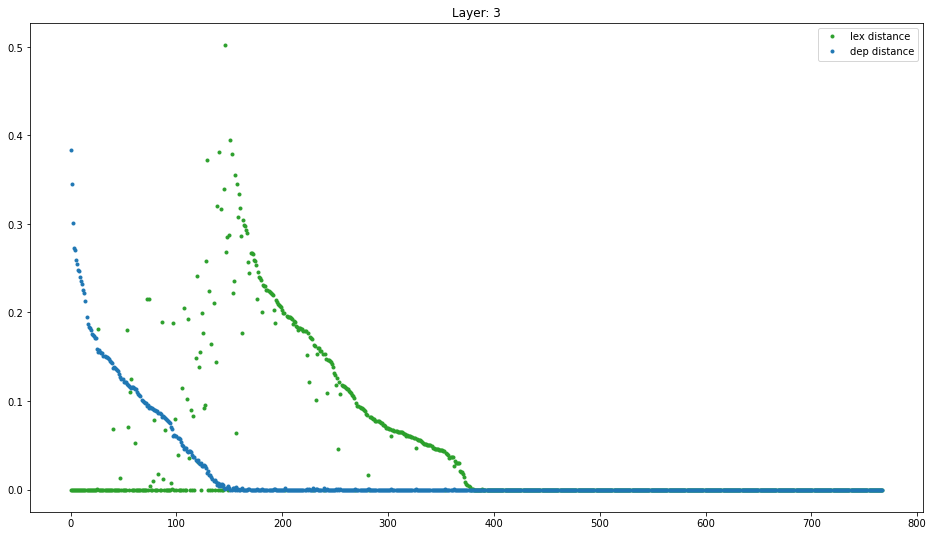

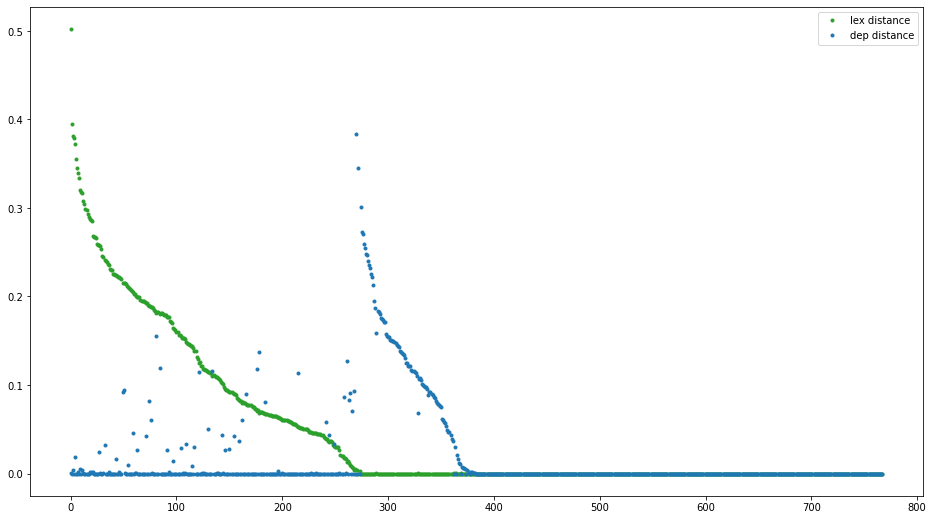

In [264]:
layer_idx = 3

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

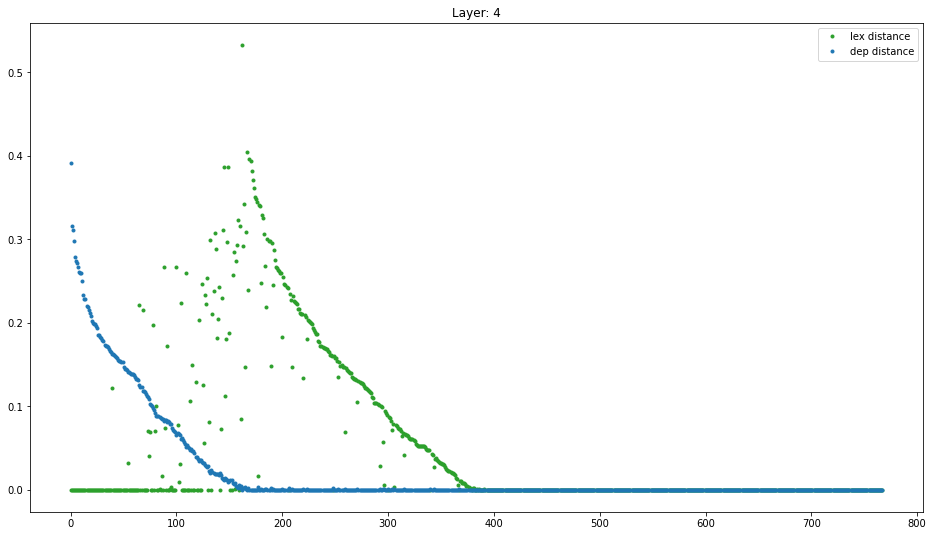

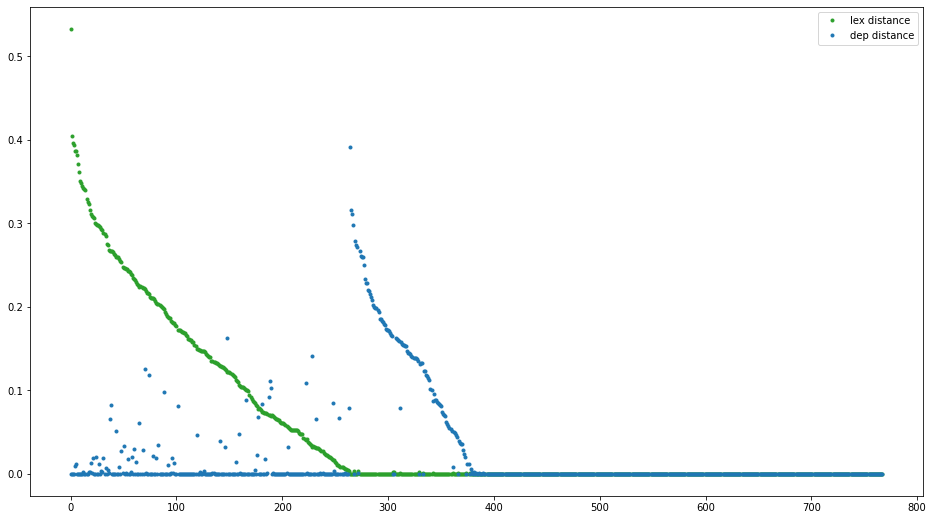

In [265]:
layer_idx = 4

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

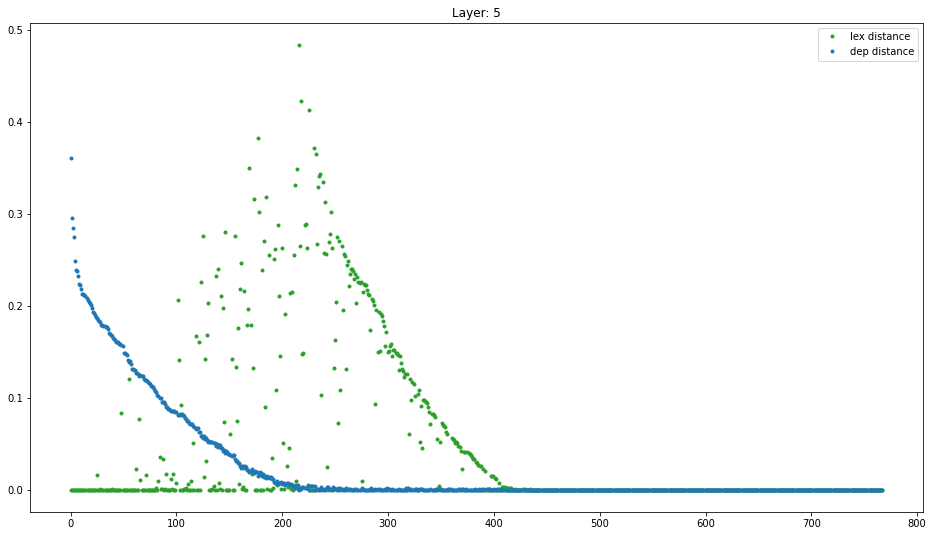

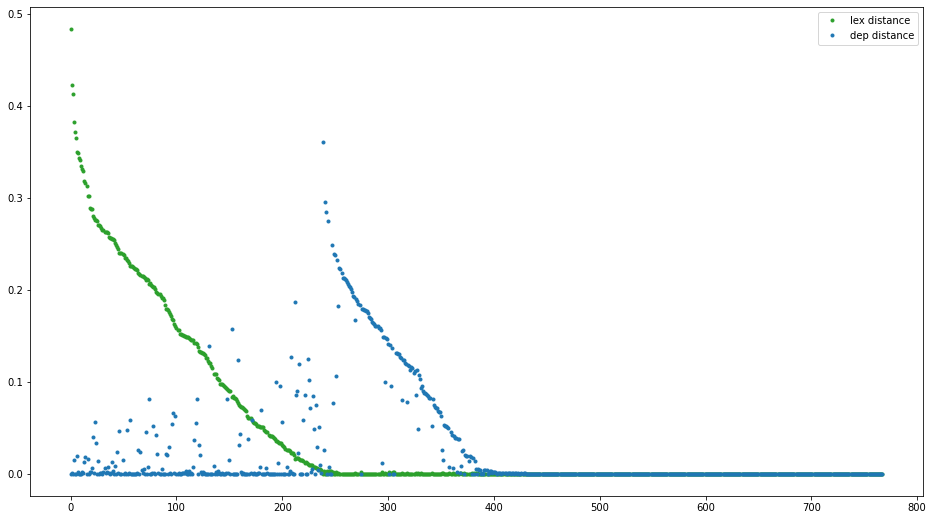

In [266]:
layer_idx = 5

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

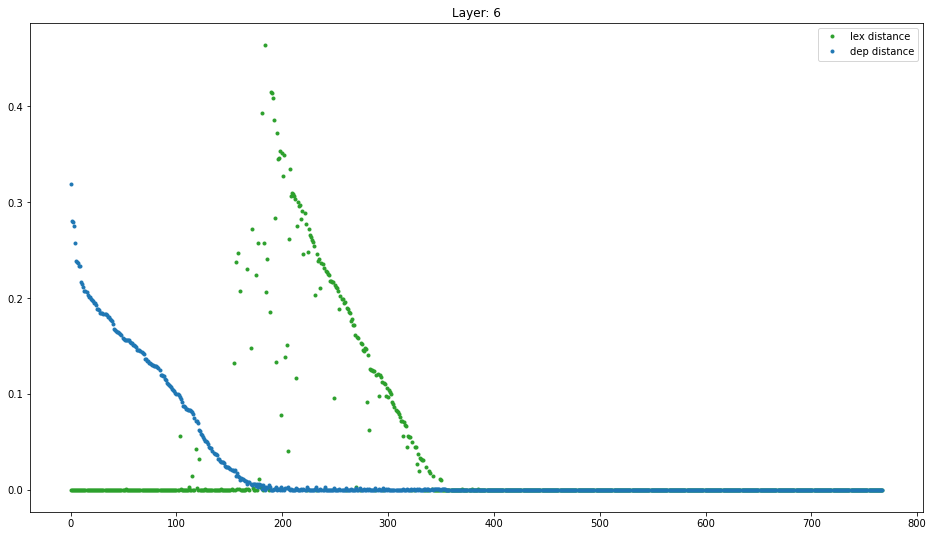

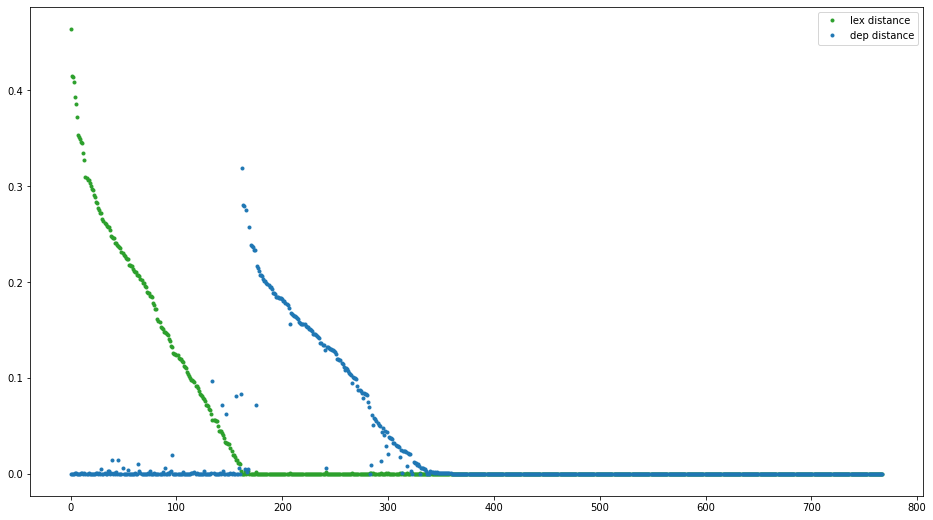

In [267]:
layer_idx = 6

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

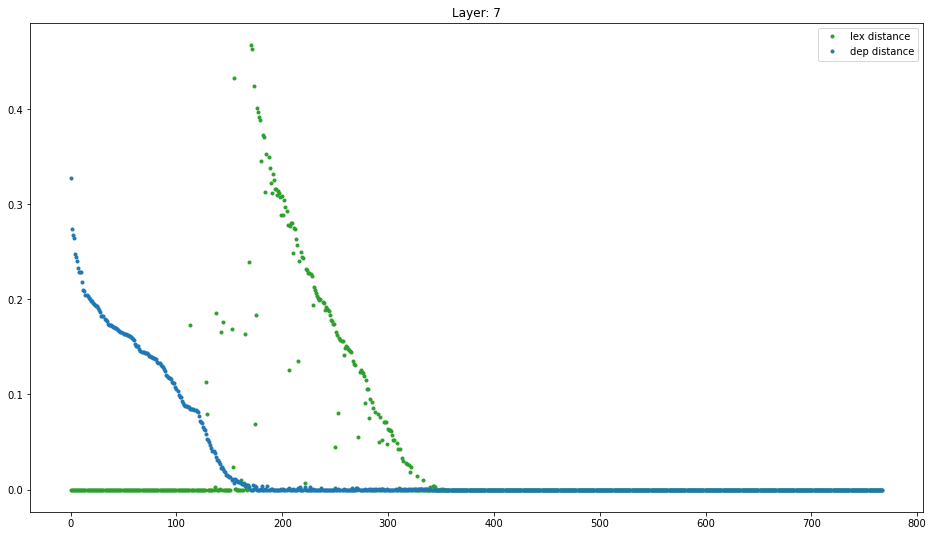

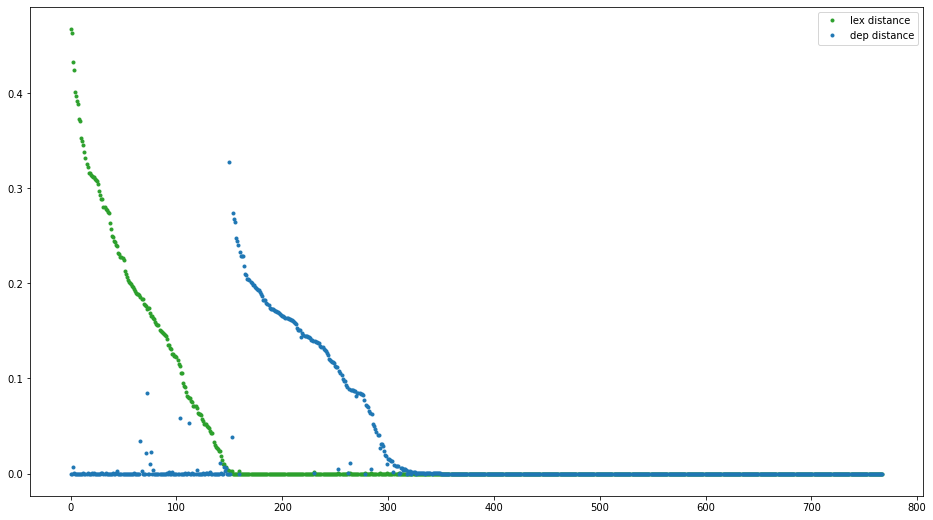

In [268]:
layer_idx = 7

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

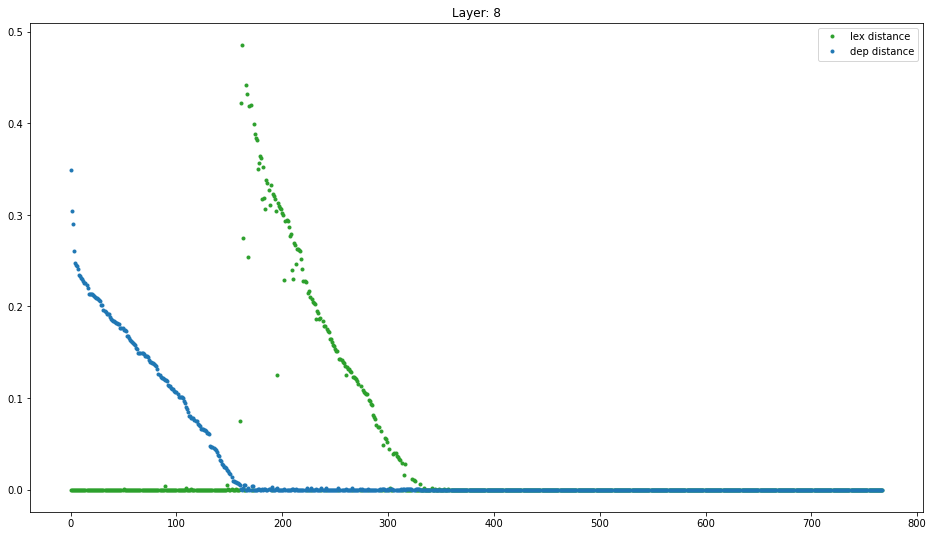

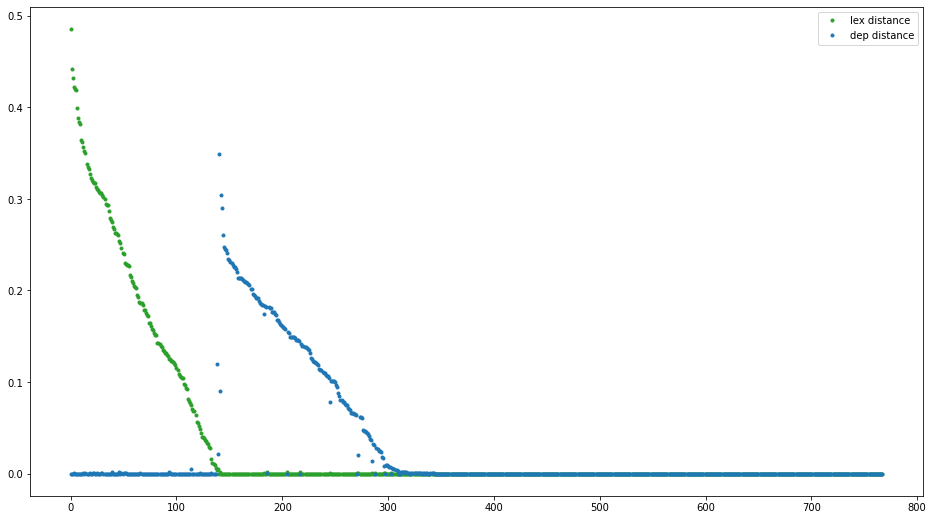

In [269]:
layer_idx = 8

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

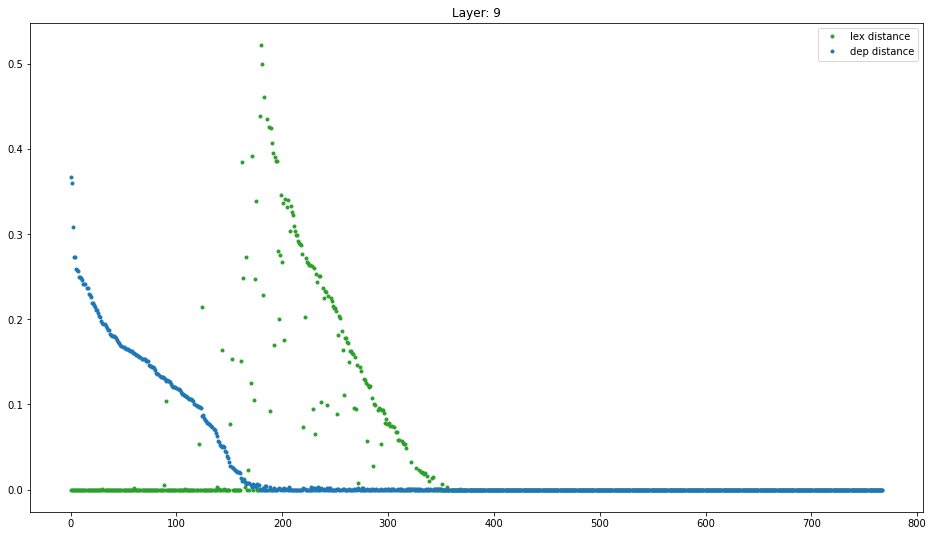

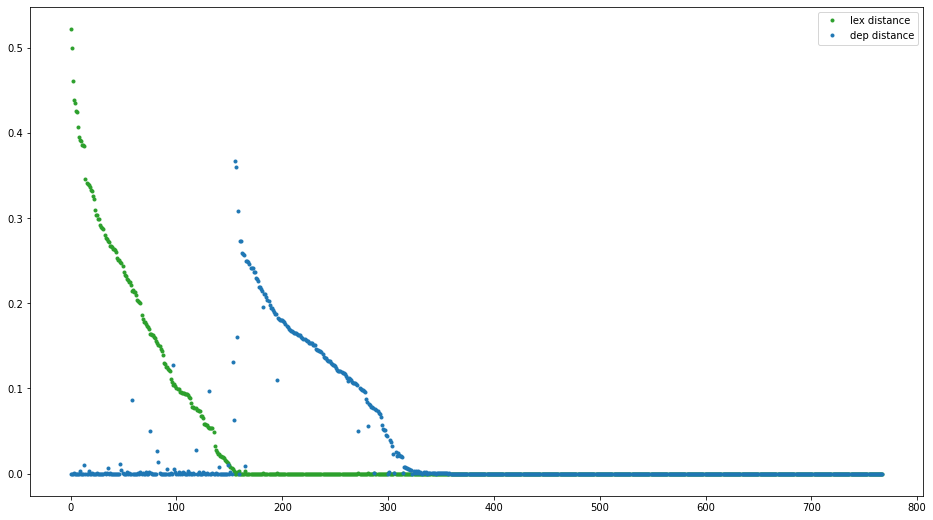

In [270]:
layer_idx = 9

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

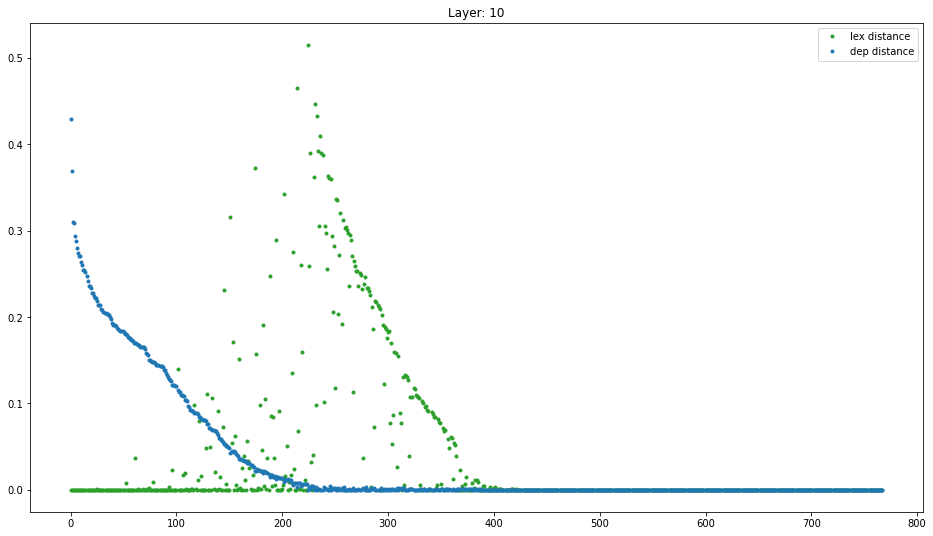

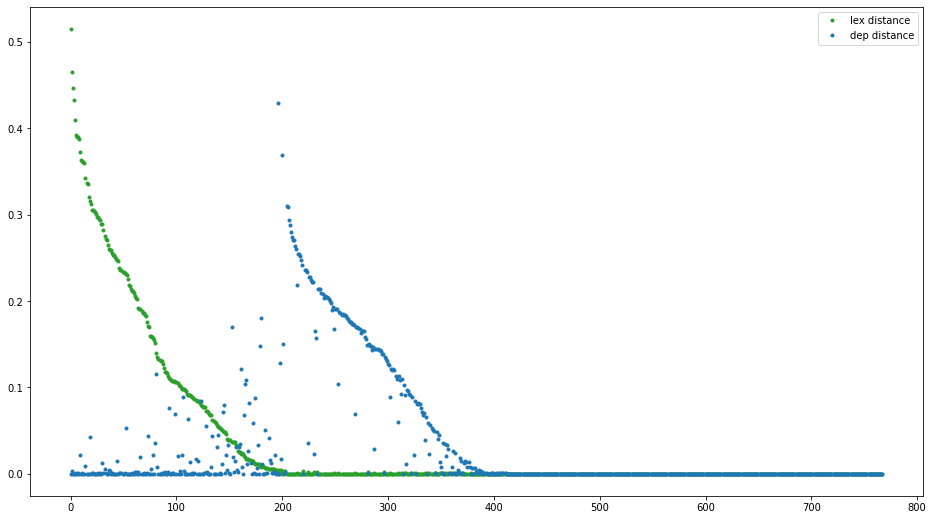

In [271]:
layer_idx = 10

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

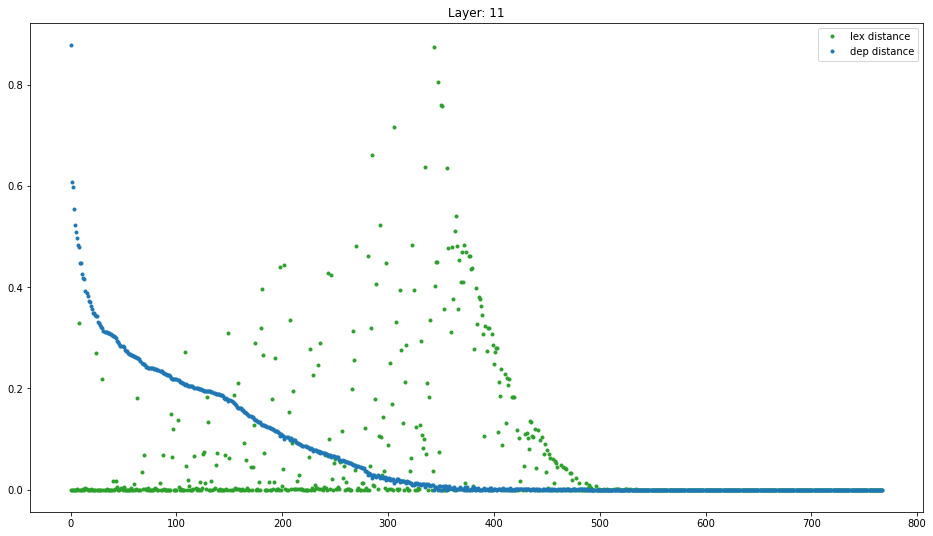

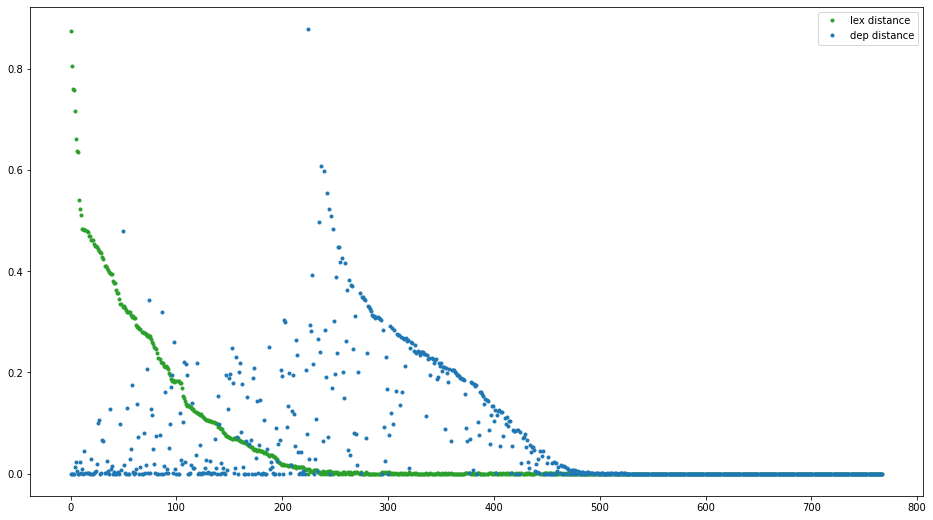

In [272]:
layer_idx = 11

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

### dep vs der


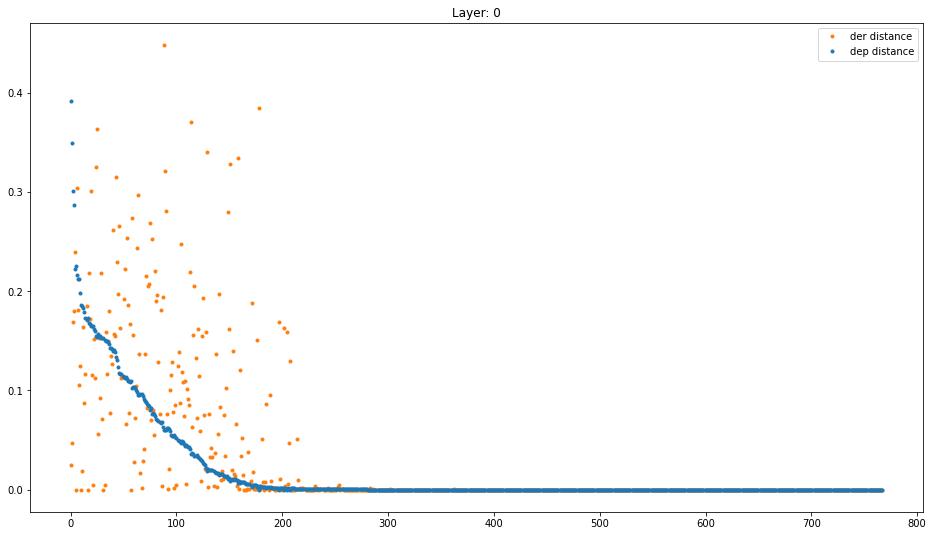

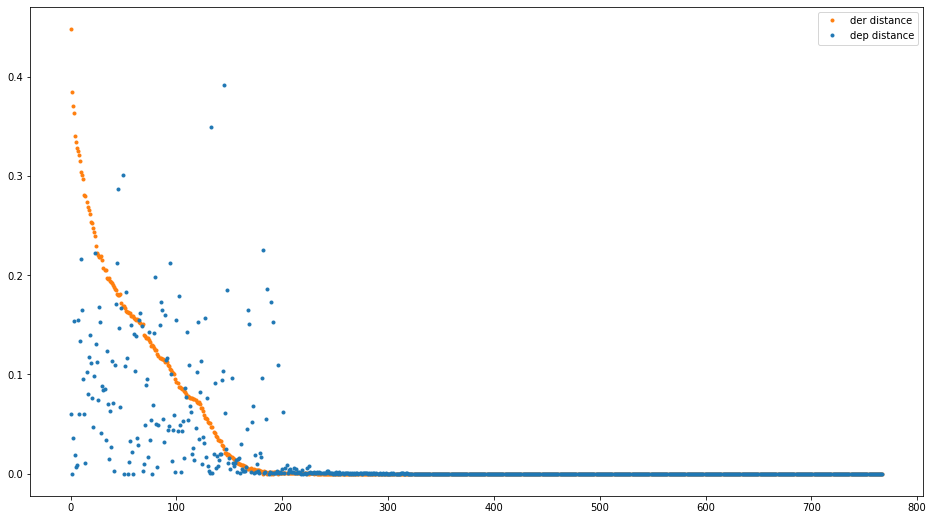

In [273]:
layer_idx = 0

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([der_distance_probe, dep_distance_probe], 
                              ['der distance', 'dep distance'])

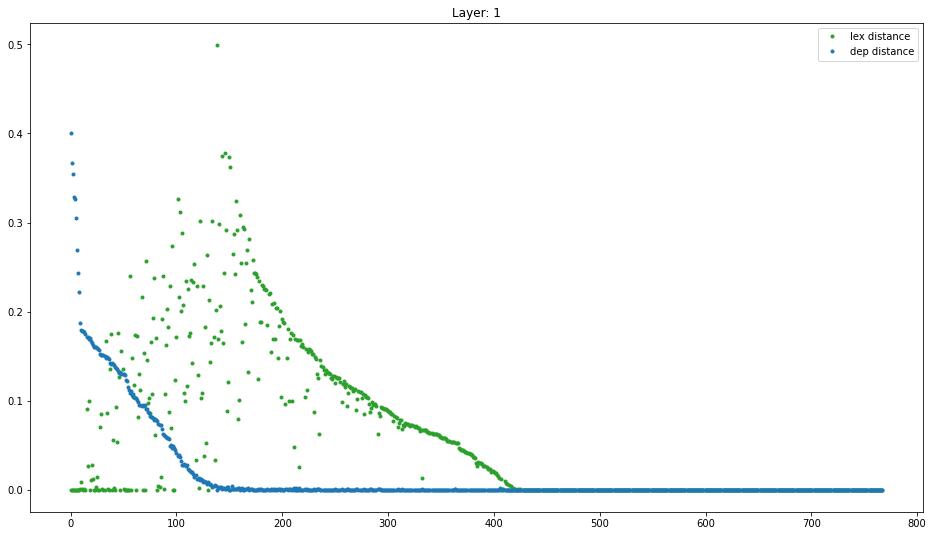

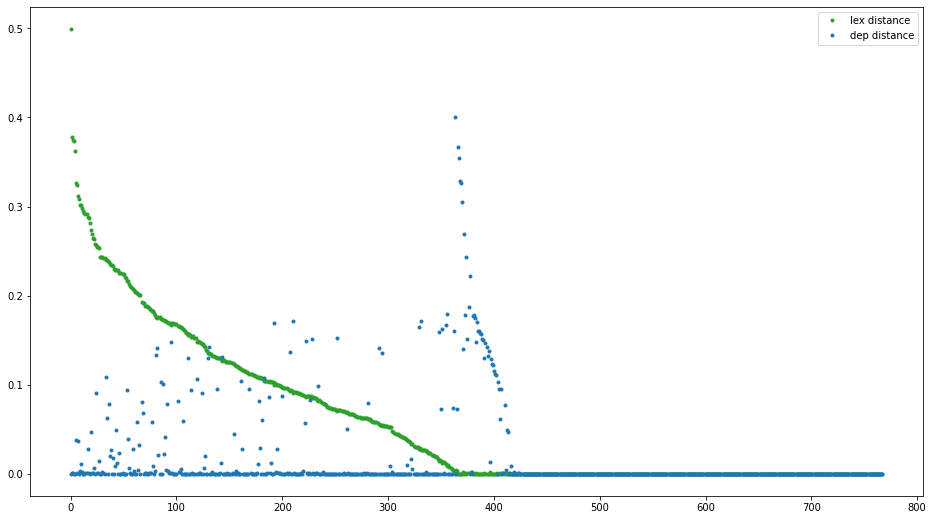

In [274]:
layer_idx = 1

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

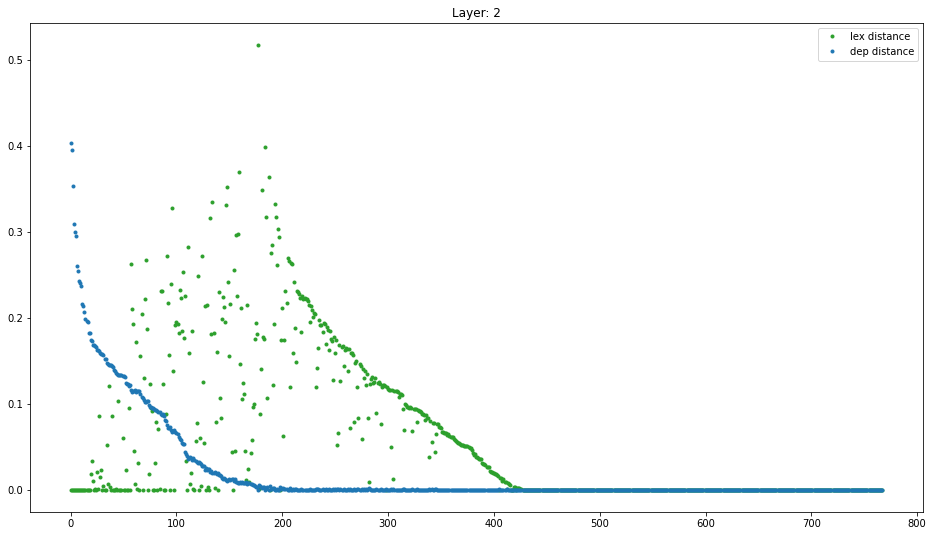

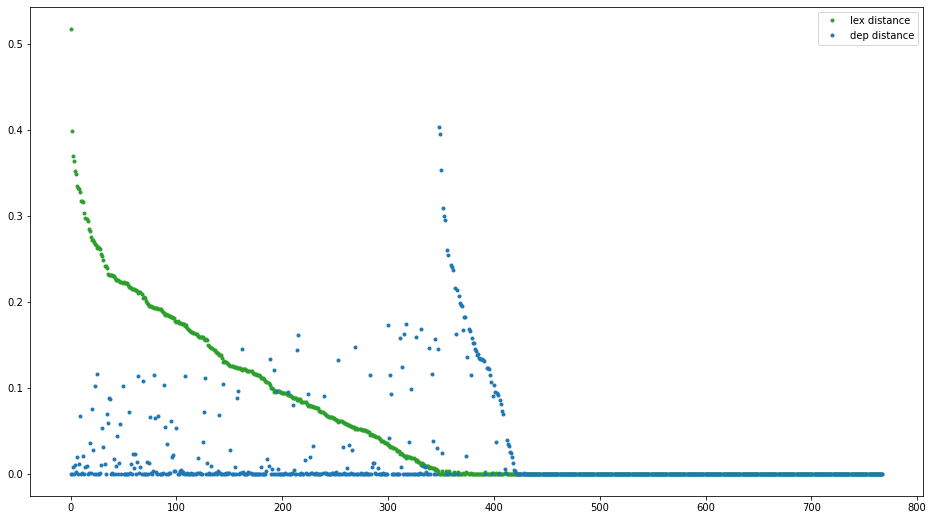

In [275]:
layer_idx = 2

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

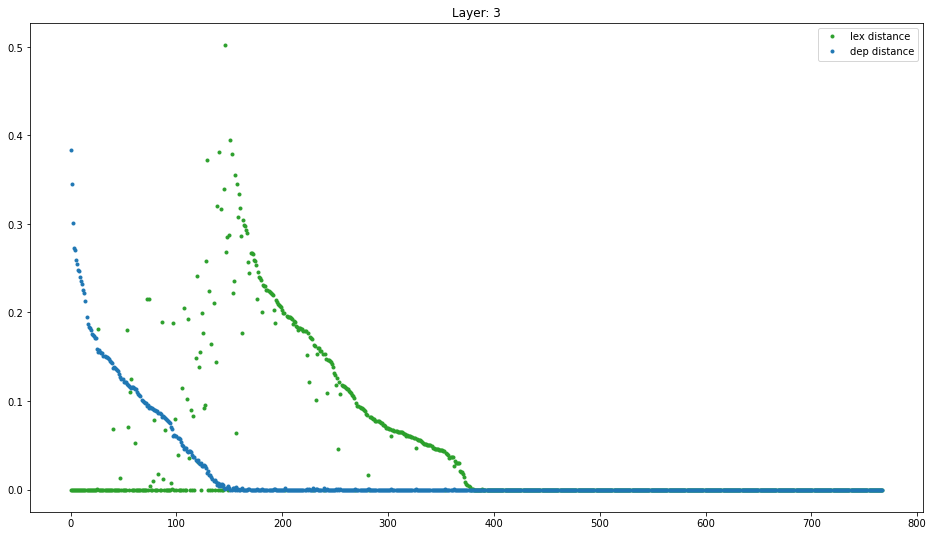

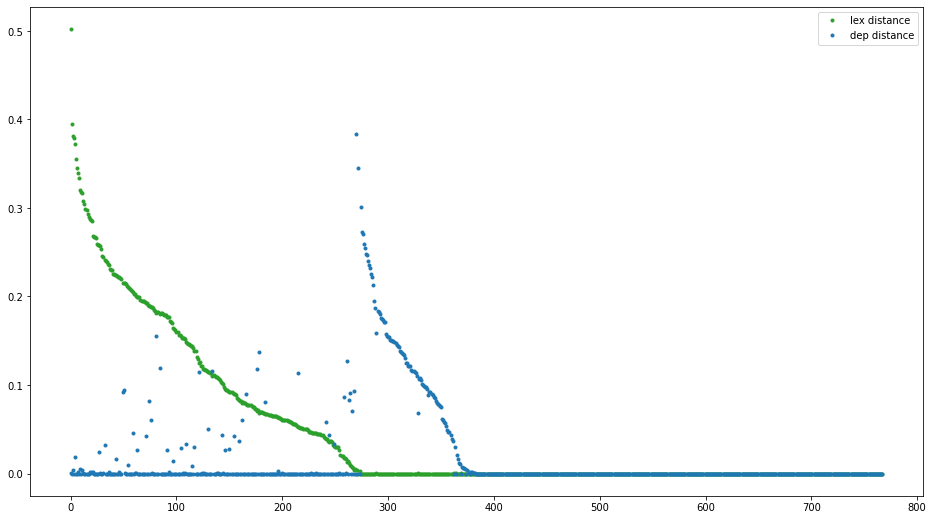

In [276]:
layer_idx = 3

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

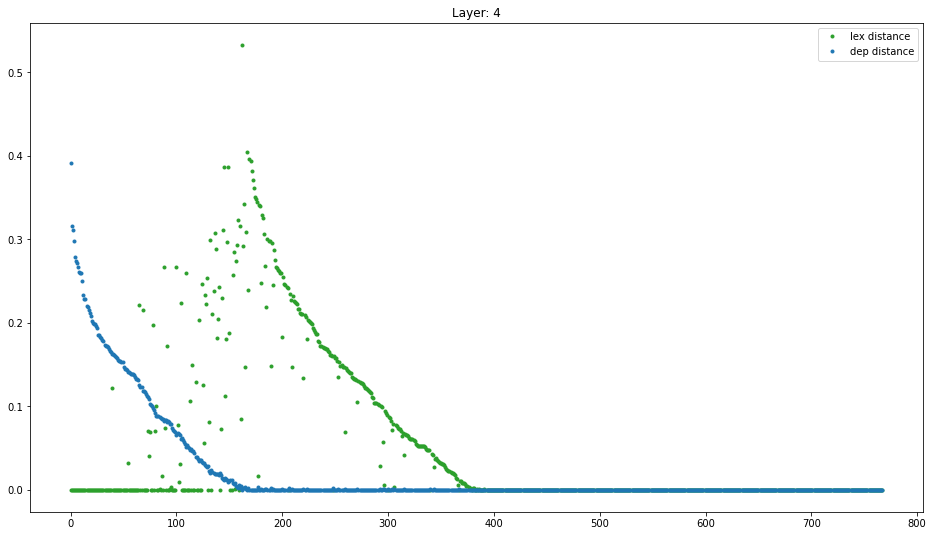

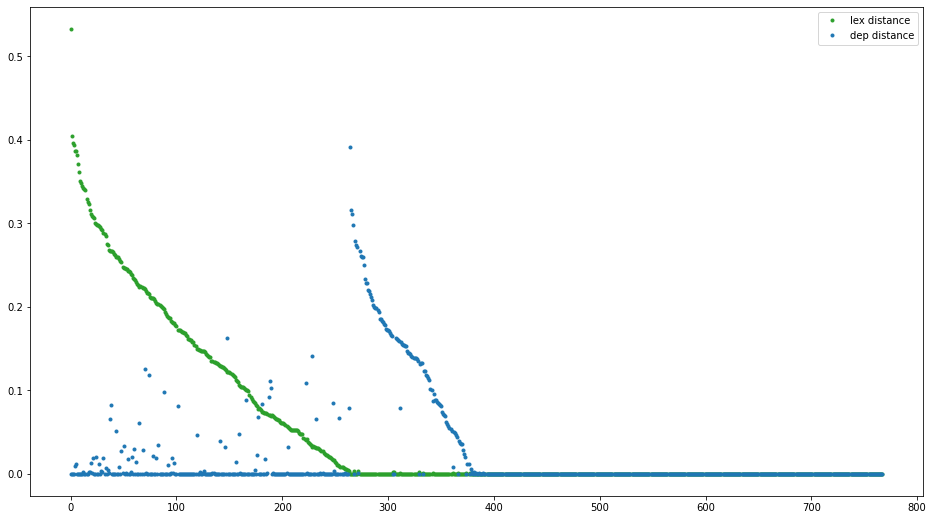

In [277]:
layer_idx = 4

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

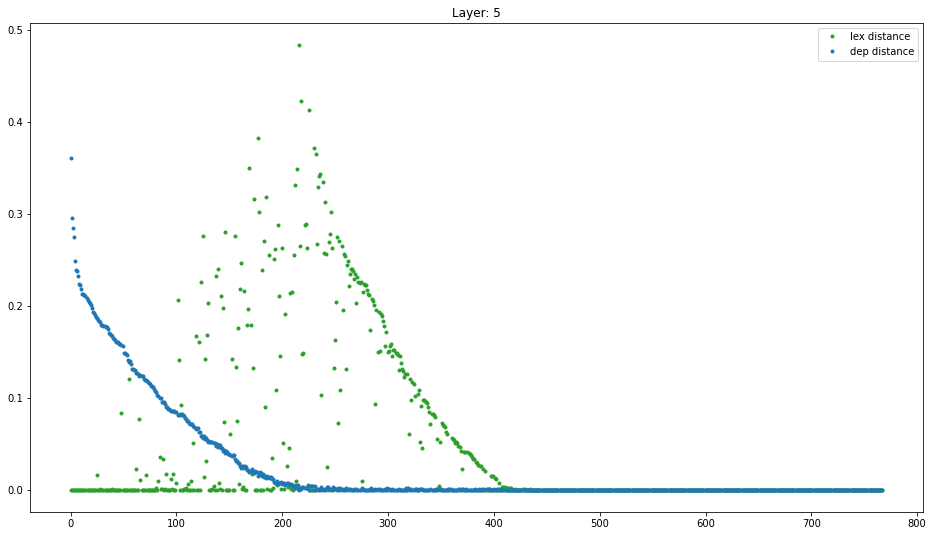

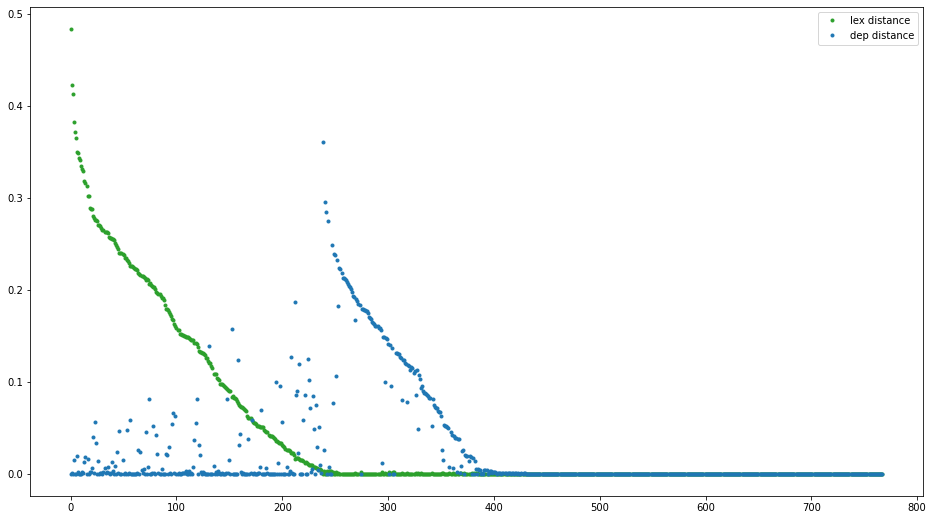

In [278]:
layer_idx = 5

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

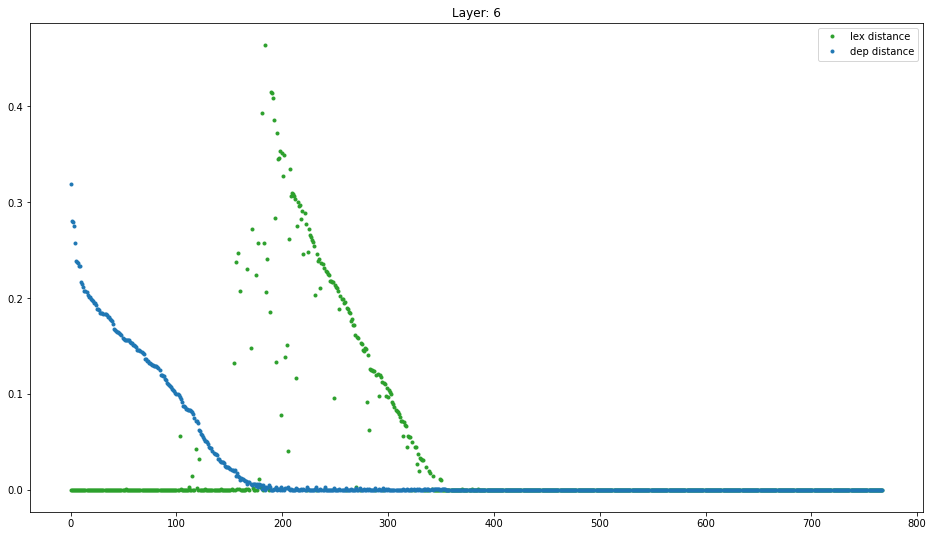

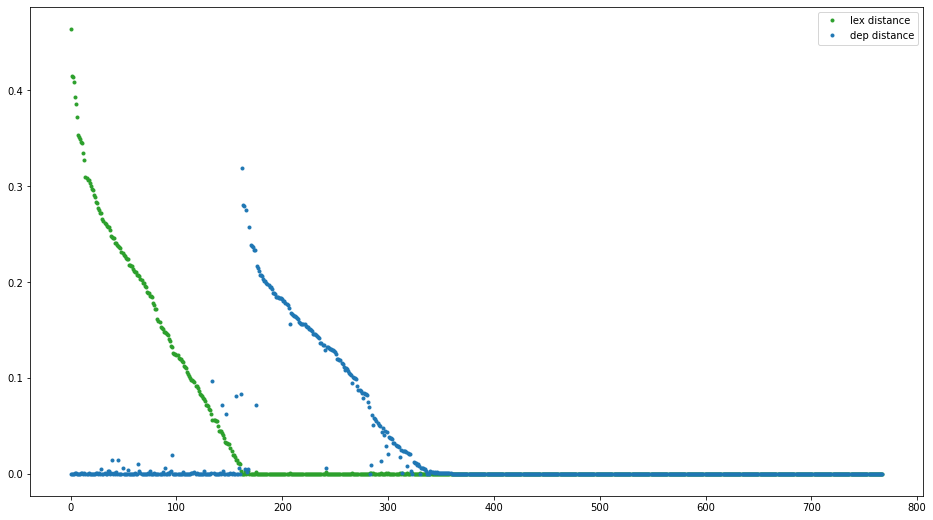

In [279]:
layer_idx = 6

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

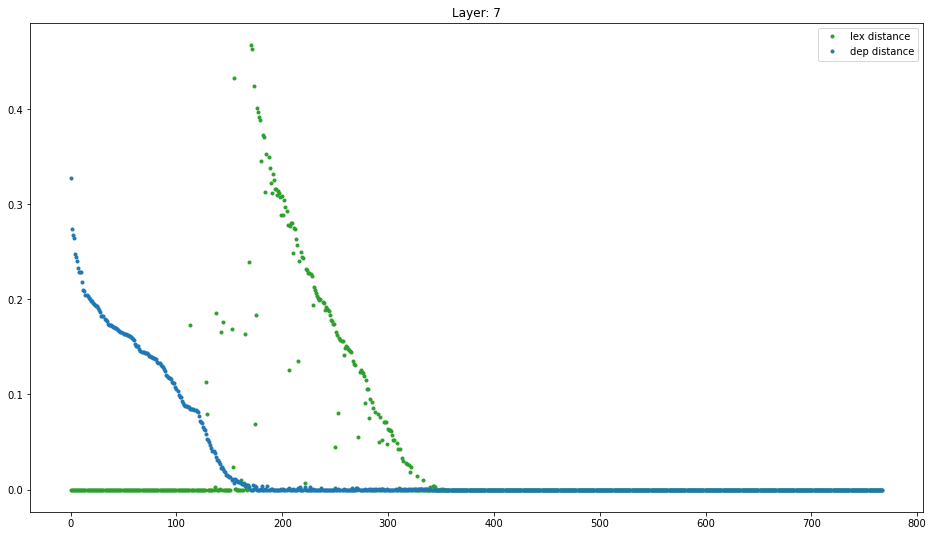

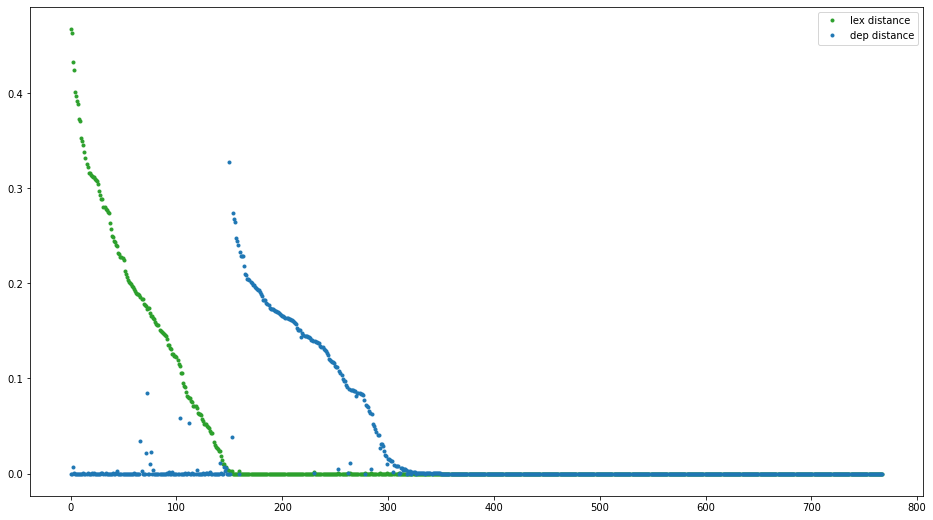

In [280]:
layer_idx = 7

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

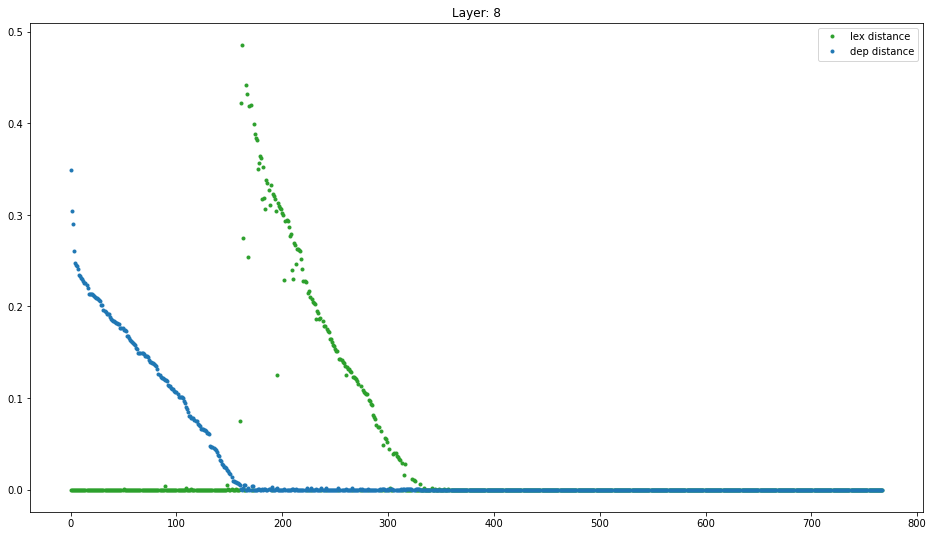

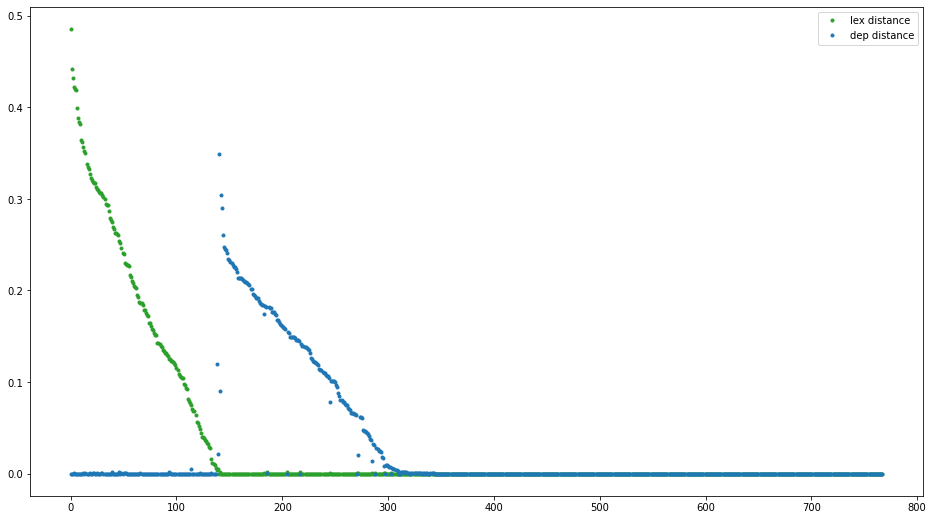

In [281]:
layer_idx = 8

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

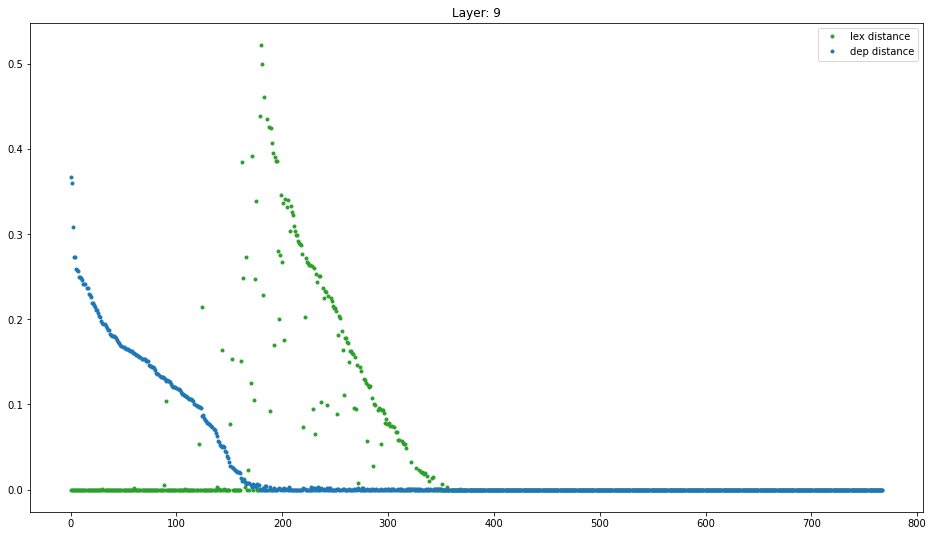

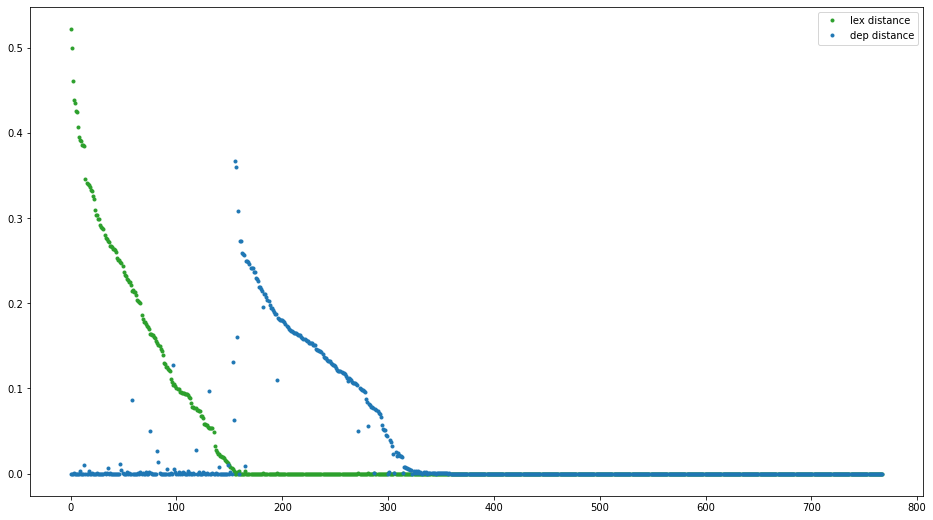

In [282]:
layer_idx = 9

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

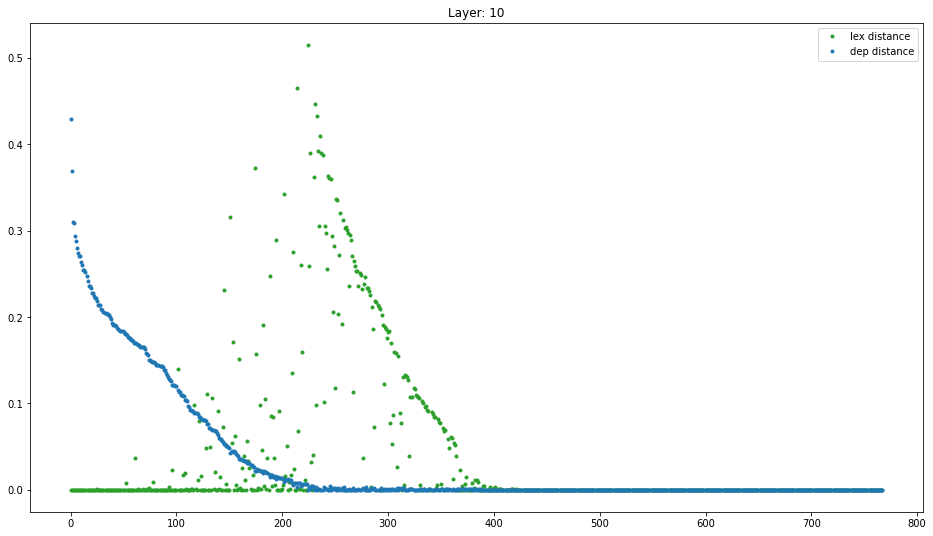

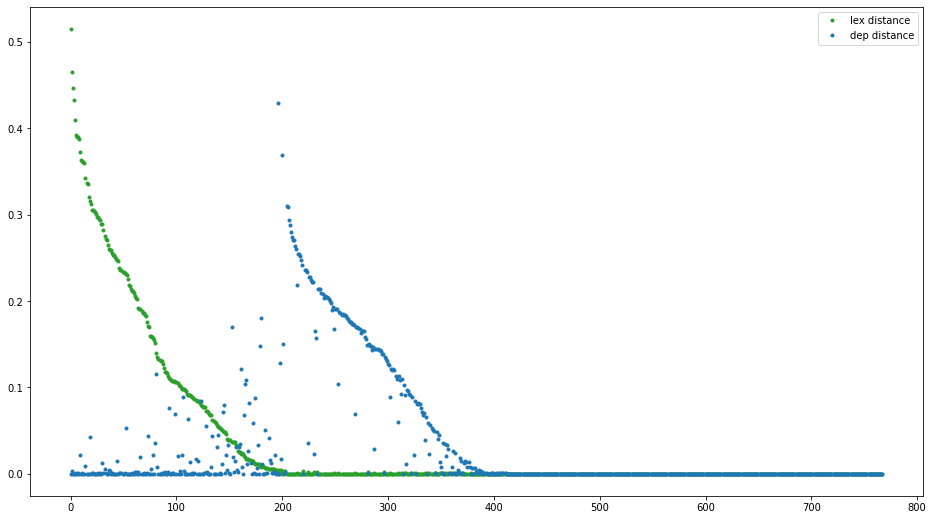

In [283]:
layer_idx = 10

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])

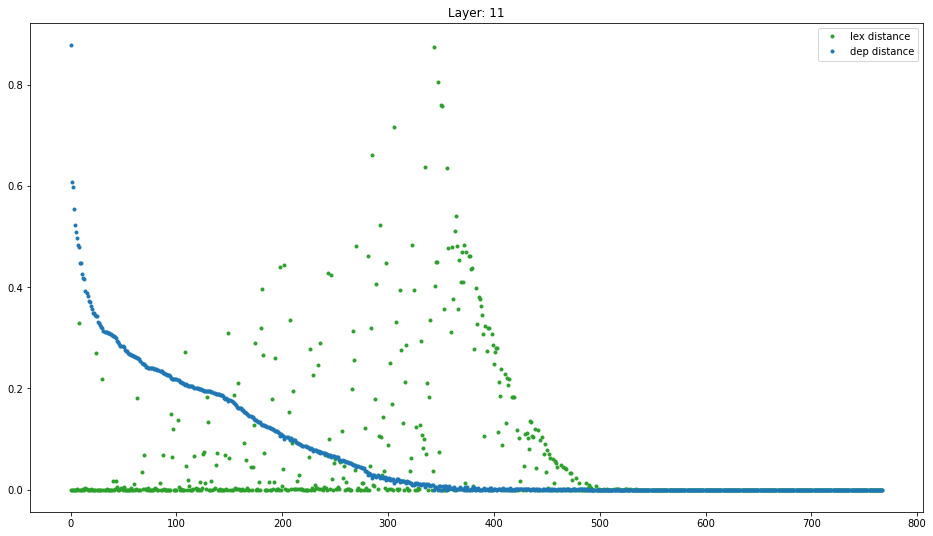

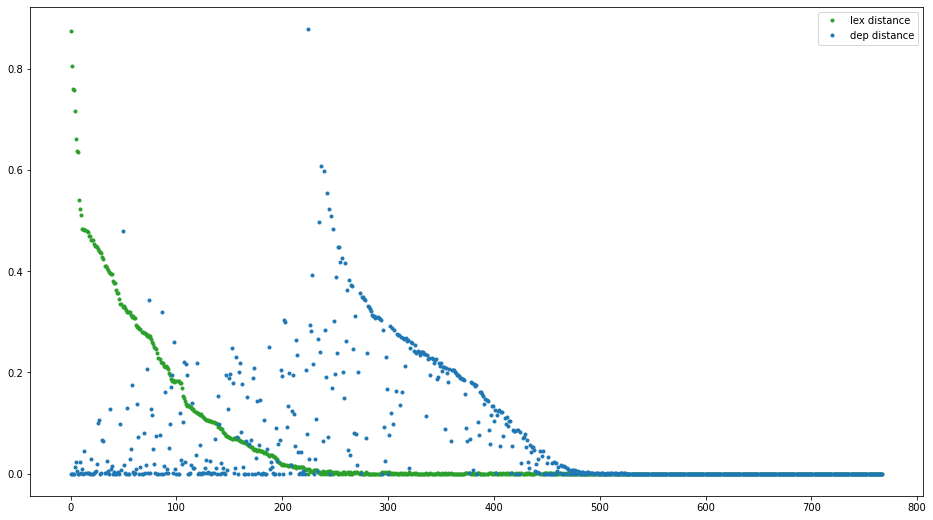

In [284]:
layer_idx = 11

ckpt = load_ckpt(layer_idx)
dep_distance_probe = ckpt.dep_distance.numpy().ravel()
lex_distance_probe = ckpt.lex_distance.numpy().ravel()
der_distance_probe = ckpt.der_distance.numpy().ravel()

visualize_disentanglement([lex_distance_probe, dep_distance_probe], 
                              ['lex distance', 'dep distance'])